<a href="https://colab.research.google.com/github/nicolasero87/Personas-Privadas-Libertad-MusicaSpotify-Nicolas_Rom-n/blob/main/5.%20Spotify_Nicolas_Rom%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONSIGNA
Identificarás 3 datasets potenciales con las siguientes características:
 i) al menos 2000 filas,
 ii) al menos 15 columnas.



####Importacion de librerias y conexion a la carpeta de GitHub

In [2]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

In [3]:
! git clone https://github.com/nicolasero87/PPL_ALTAS.git

Cloning into 'PPL_ALTAS'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 28.65 MiB | 10.00 MiB/s, done.
Resolving deltas: 100% (22/22), done.


# **DATA BASE N° 1 PERSONAS PRIVADAS DE LA LIBERTAD**
documento: DB_Altas_PPL_Entrega 19-08.xlsx
ANALISIS DE VARIABLES:
Analizar la Población que ingreso como Privada de la Libertad en la Provincia de Buenos Aires.

Se pretende analizar las características de la población. Las variables mas interesantes para ello podrian ser:

 genero

 bien juridico afectado (por la comision del delito),

 departamento judicial ( ranking de organismos judiciales que mas personas recibibieron en ese rango temporal)


Hipotesis ¿Cuál es la relación entre ??? y ???. Objetivo Reconocer los delitos cometidos por las Personas Privadas de Libertad, y la distribucion por departamento judicial y organos judiciales.

In [ ]:
import pandas as pd
df = pd.read_excel('/content/PPL_ALTAS/DB_Altas_PPL_Entrega 19-08.xlsx')

In [ ]:
df.head()

,id Unico,fecha308,ID_sexo,Sexo,ID_bienjuridico,bienjuridico,ID_clasifcg,clasifcg,ID_depto,depto,...,Depto UFD,UFD,DIM_dep_Policial,Dep Policial,ID_Flagrancia,Flagrancia,ID_Revifag,revifag,ID_Delito Max Pena,Delito Max Pena
0,1,03-04-2024,1,M,1.0,Delitos contra las personas,1.0,Lesiones leves agravadas,1,Avellaneda,...,Avellaneda,Unidad Funcional De Defensa Penal Nº 10 Especi...,1,Lanus 5º,1,Proceso Especial de Flagrancia,1,SI,1.0,Lesiones agravadas artículo 89 - Art.92
1,2,03-04-2024,1,M,2.0,Delitos contra la Administración Pública,2.0,Encubrimiento,1,Avellaneda,...,Avellaneda,Unidad de Defensa Penal N° 3 AVELLANEDA,1,Lanus 5º,0,NaN,2,NO,2.0,Encubrimiento - Art.277 Inc.1º
2,3,03-04-2024,1,M,3.0,Delitos contra la propiedad,3.0,Robo agravado uso de arma,1,Avellaneda,...,Avellaneda,Unidad de Defensa Penal N° 3 AVELLANEDA,2,Avellaneda 5º,0,NaN,2,NO,3.0,Robo agravado (uso de arma de fuego no apta pa...
3,4,03-04-2024,1,M,1.0,Delitos contra las personas,4.0,Lesiones leves,1,Avellaneda,...,Avellaneda,Unidad Funcional De Defensa Penal Nº 10 Especi...,3,Lanus 7º,1,Proceso Especial de Flagrancia,1,SI,4.0,Lesiones leves - Art.89
4,5,03-04-2024,2,F,4.0,Delitos contra la seguridad pública,5.0,Portación y Tenencia de arma de fuego,1,Avellaneda,...,Avellaneda,Unidad de Defensa Penal N° 3 AVELLANEDA,4,Lanus 8º,1,Proceso Especial de Flagrancia,2,NO,5.0,Tenencia ilegal de arma de fuego de uso civil ...


In [ ]:
df.shape

(2009, 25)

In [ ]:
df.depto.unique()

array(['Avellaneda', 'Azul', 'Bahia Blanca', 'Dolores', 'Junin',
       'La Matanza', 'La Plata', 'Lomas De Zamora', 'Mar Del Plata',
       'Mercedes', 'Moreno-Gral. Rodriguez'], dtype=object)

In [ ]:
df.bienjuridico.unique()

array(['Delitos contra las personas',
       'Delitos contra la Administración Pública',
       'Delitos contra la propiedad',
       'Delitos contra la seguridad pública', nan,
       'Delitos contra la libertad',
       'Delitos contra la integridad sexual',
       'Delitos contra la administración pública',
       'Delitos contra el orden Público', 'Leyes',
       'Delitos contra la fe Pública', 'Otros'], dtype=object)

In [ ]:
df.isnull().sum()

,0
id Unico,0
fecha308,9
ID_sexo,0
Sexo,0
ID_bienjuridico,44
bienjuridico,44
ID_clasifcg,44
clasifcg,44
ID_depto,0
depto,0


In [ ]:
## reemplazar is null en flagrancia por 0

In [ ]:
##no sirve porque no son valores cuantificables
df.describe().round()

,id Unico,ID_sexo,ID_bienjuridico,ID_clasifcg,ID_depto,ID_Depto Organismo Final,DIM_dep_Policial,ID_Flagrancia,ID_Revifag,ID_Delito Max Pena
count,2009.0,2009.0,1965.0,1965.0,2009.0,2005.0,2009.0,2009.0,2009.0,1965.0
mean,1005.0,1.0,3.0,10.0,6.0,6.0,135.0,0.0,2.0,31.0
std,580.0,0.0,1.0,7.0,3.0,3.0,90.0,0.0,0.0,27.0
min,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
25%,503.0,1.0,3.0,5.0,4.0,2.0,49.0,0.0,2.0,11.0
50%,1005.0,1.0,3.0,7.0,7.0,7.0,144.0,0.0,2.0,24.0
75%,1507.0,1.0,3.0,17.0,8.0,8.0,209.0,1.0,2.0,45.0
max,2009.0,3.0,11.0,35.0,11.0,12.0,312.0,1.0,2.0,138.0


In [ ]:
df.describe(include='object')

,fecha308,Sexo,bienjuridico,clasifcg,depto,Depto Organismo Final,Organismo Final,Depto UFI,UFI,Depto UFD,UFD,Dep Policial,Flagrancia,revifag,Delito Max Pena
count,2000,2009,1965,1965,2009,2005,2005,1998,1998,2000,2000,1815,540,2009,1965
unique,31,3,11,34,11,11,62,11,143,11,93,311,1,2,137
top,22-04-2024,M,Delitos contra la propiedad,Robo,La Plata,La Plata,JG-Nº 3,La Plata,UFI Flagrancia,La Plata,UFD La Matanza,Cdo.pat. B. Blanca,Proceso Especial de Flagrancia,NO,Robo - Art.164
freq,129,1820,998,298,438,438,324,438,168,438,259,41,540,1833,176


In [ ]:
##posibles preguntas: 1. cual es el organismo final que mas ingresos tuvo? ordenar los 5 primeros 2. cuales son los 10 primeros delitos maxima pena?

### **ANALISIS SEGUN GENERO**

In [ ]:
df_genero = df.Sexo.value_counts().rename('Cantidad').rename_axis('Género').rename(index={'M': 'Masculino', 'F': 'Femenino', 'X': 'No Binario'})
df_genero

,Cantidad
Género,
Masculino,1820
Femenino,188
No Binario,1


<Axes: xlabel='Género', ylabel='Cantidad'>

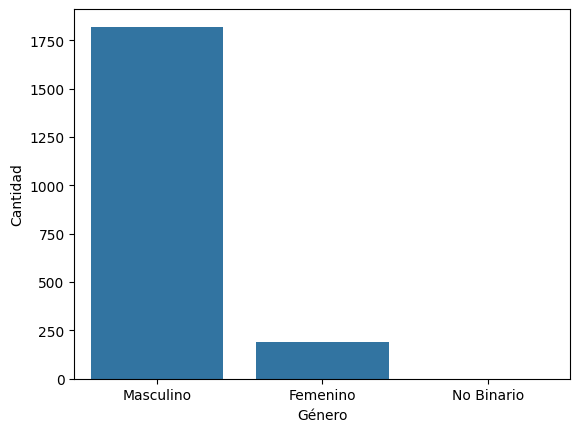

In [ ]:
sns.barplot(data=df_genero)


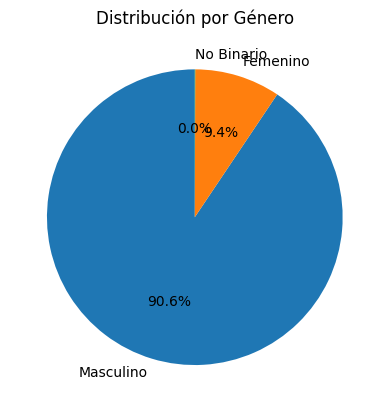

In [ ]:
plt.pie(df_genero.values, labels=df_genero.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución por Género")
plt.show()

In [ ]:
df_depto_genero=df[['Sexo','bienjuridico','depto']].groupby(by=['Sexo', 'bienjuridico', 'depto']).count().rename_axis(['Género', 'Bien Jurídico', 'Departamento'])
df_depto_genero


Empty DataFrame
Columns: []
Index: [(F, Delitos contra la Administración Pública, Bahia Blanca), (F, Delitos contra la Administración Pública, Dolores), (F, Delitos contra la Administración Pública, Junin), (F, Delitos contra la Administración Pública, La Plata), (F, Delitos contra la Administración Pública, Lomas De Zamora), (F, Delitos contra la Administración Pública, Mar Del Plata), (F, Delitos contra la administración pública, La Plata), (F, Delitos contra la fe Pública, La Plata), (F, Delitos contra la integridad sexual, Bahia Blanca), (F, Delitos contra la libertad, Azul), (F, Delitos contra la libertad, Bahia Blanca), (F, Delitos contra la libertad, Dolores), (F, Delitos contra la libertad, Junin), (F, Delitos contra la libertad, La Matanza), (F, Delitos contra la libertad, Lomas De Zamora), (F, Delitos contra la libertad, Mar Del Plata), (F, Delitos contra la libertad, Mercedes), (F, Delitos contra la propiedad, Avellaneda), (F, Delitos contra la propiedad, Azul), (F, Delitos contra la propiedad, Bahia Blanca), (F, Delitos contra la propiedad, Dolores), (F, Delitos contra la propiedad, Junin), (F, Delitos contra la propiedad, La Matanza), (F, Delitos contra la propiedad, La Plata), (F, Delitos contra la propiedad, Lomas De Zamora), (F, Delitos contra la propiedad, Mar Del Plata), (F, Delitos contra la propiedad, Mercedes), (F, Delitos contra la propiedad, Moreno-Gral. Rodriguez), (F, Delitos contra la seguridad pública, Avellaneda), (F, Delitos contra la seguridad pública, Azul), (F, Delitos contra la seguridad pública, Bahia Blanca), (F, Delitos contra la seguridad pública, Dolores), (F, Delitos contra la seguridad pública, Junin), (F, Delitos contra la seguridad pública, La Matanza), (F, Delitos contra la seguridad pública, La Plata), (F, Delitos contra la seguridad pública, Lomas De Zamora), (F, Delitos contra la seguridad pública, Mar Del Plata), (F, Delitos contra la seguridad pública, Mercedes), (F, Delitos contra las personas, Avellaneda), (F, Delitos contra las personas, Bahia Blanca), (F, Delitos contra las personas, Junin), (F, Delitos contra las personas, La Plata), (F, Delitos contra las personas, Lomas De Zamora), (F, Delitos contra las personas, Mar Del Plata), (M, Delitos contra el orden Público, Azul), (M, Delitos contra el orden Público, La Matanza), (M, Delitos contra el orden Público, La Plata), (M, Delitos contra el orden Público, Mercedes), (M, Delitos contra la Administración Pública, Avellaneda), (M, Delitos contra la Administración Pública, Azul), (M, Delitos contra la Administración Pública, Bahia Blanca), (M, Delitos contra la Administración Pública, Dolores), (M, Delitos contra la Administración Pública, Junin), (M, Delitos contra la Administración Pública, La Matanza), (M, Delitos contra la Administración Pública, La Plata), (M, Delitos contra la Administración Pública, Lomas De Zamora), (M, Delitos contra la Administración Pública, Mar Del Plata), (M, Delitos contra la Administración Pública, Mercedes), (M, Delitos contra la administración pública, Avellaneda), (M, Delitos contra la administración pública, Bahia Blanca), (M, Delitos contra la administración pública, Junin), (M, Delitos contra la administración pública, La Matanza), (M, Delitos contra la administración pública, La Plata), (M, Delitos contra la administración pública, Lomas De Zamora), (M, Delitos contra la administración pública, Mar Del Plata), (M, Delitos contra la administración pública, Mercedes), (M, Delitos contra la administración pública, Moreno-Gral. Rodriguez), (M, Delitos contra la fe Pública, La Matanza), (M, Delitos contra la fe Pública, La Plata), (M, Delitos contra la integridad sexual, Avellaneda), (M, Delitos contra la integridad sexual, Azul), (M, Delitos contra la integridad sexual, Dolores), (M, Delitos contra la integridad sexual, Junin), (M, Delitos contra la integridad sexual, La Matanza), (M, Delitos contra la integridad sexual, La Plata), (M, Delitos contra la integridad sexual, Lomas De Zamora), (M

In [ ]:
##hacer un grafico con esta tabla

## **ANALISIS SEGUN BIEN JURIDICO TUTELADO**

In [ ]:
df_bienjurico_top = df.bienjuridico.value_counts().head(5).rename_axis('Bien Juridico Tutelado').rename('Cantidad')
df_bienjurico_top

,Cantidad
Bien Juridico Tutelado,
Delitos contra la propiedad,998
Delitos contra la Administración Pública,261
Delitos contra la seguridad pública,223
Delitos contra la libertad,205
Delitos contra las personas,179


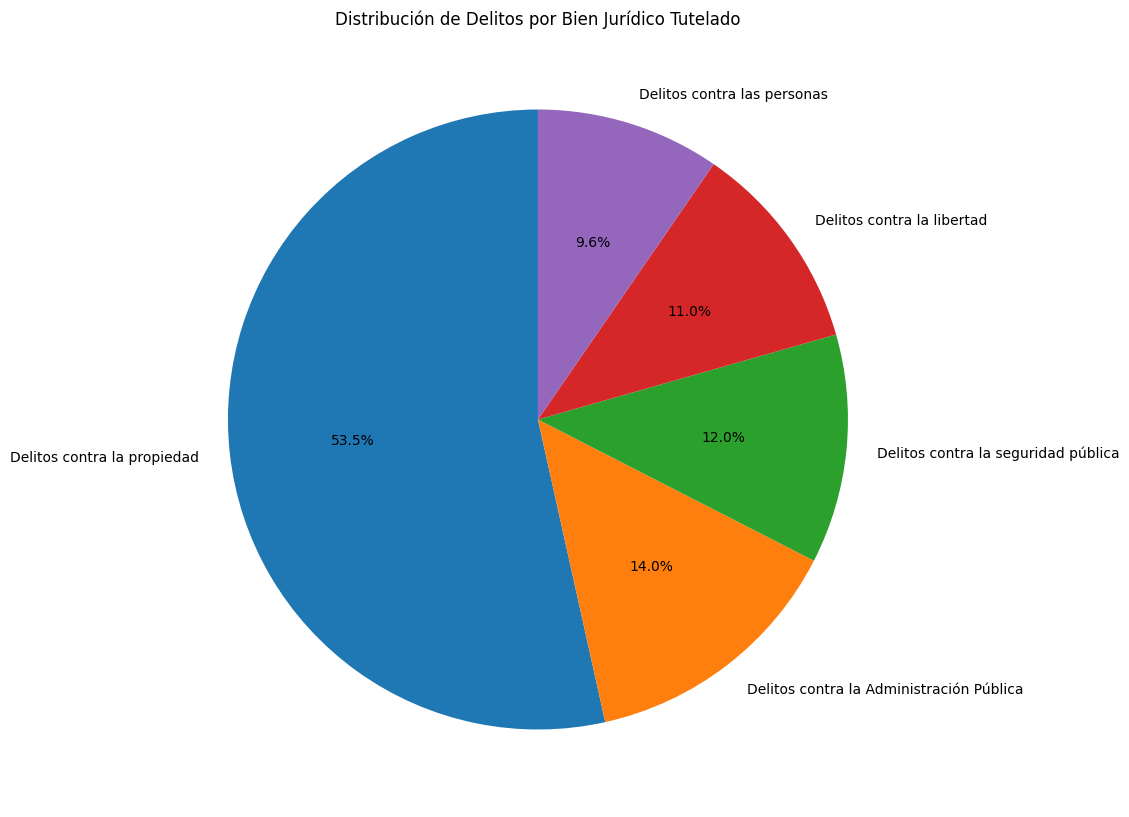

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 18))
df_bienjurico_top.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribución de Delitos por Bien Jurídico Tutelado")
plt.ylabel('')  # Remove the default y-label
plt.show()

## **ANALISIS SEGUN DEPARTAMENTO JUDICIAL** REHACER LOS GRAFICOS ERROR

In [ ]:
df_depto_top = df.depto.value_counts().head(5)rename_axis('Departamento Judicial').rename('Cantidad')
df_depto_top

####df_bienjurico_top = df.bienjuridico.value_counts().head(5).rename_axis('Bien Juridico Tutelado').rename('Cantidad')
#df_bienjurico_top

SyntaxError: invalid syntax (<ipython-input-21-a06a6884a580>, line 1)

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=df_depto_top.index, y=df_depto_top.values)
plt.xlabel("Departamento Judicial")
plt.ylabel("Cantidad")
plt.title("Top 5 Departamentos Judiciales por Cantidad de Personas Privadas de Libertad")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## **ANALISIS SEGUN DELITO**



In [ ]:
df_delito = df[['clasifcg','depto']].groupby(by=['clasifcg', 'depto']).size().rename('Cantidad').rename_axis(['Delito', 'Departamento'])
df_delito

In [ ]:
##los 5 delitos cometidos en mayor cantidad segun departamento
df_delitos_5 = df_delito.sort_values(ascending=False).head(5)

print(df_delitos_5)

In [ ]:
##hacer grafico de torta

In [ ]:
##los 5 delitos cometidos en menor cantidad segun departamento
df_delitos_5_lowest = df_delito.sort_values(ascending=False).tail(20)
df_delitos_5_lowest

## **ANALISIS SEGUN JUZGADO**


In [ ]:
df_Organismo_Final = df[['Organismo Final','depto']].groupby(by=['Organismo Final', 'depto']).size().rename('Cantidad').rename_axis(['Juzgado', 'Departamento'])
df_Organismo_Final

In [ ]:
##ME LOS ORDENE DE MAYOR A MENOR Y ME DIGA EL TOP 5
df_Organismo_Final_sorted = df_Organismo_Final.sort_values(ascending=False).head(5)

print(df_Organismo_Final_sorted)

In [ ]:
# Convert the Series to a DataFrame for easier plotting
df_Organismo_Final_sorted = df_Organismo_Final_sorted.reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(data=df_Organismo_Final_sorted, x='Juzgado', y='Cantidad', hue='Departamento')
plt.title("Top 5 Juzgado-Departamento Combinaciones por Cantidad")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.legend(title='Departamento', loc='upper right')  # Customize legend
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_Organismo_Final_sorted is your DataFrame with the top 5 values

# Create labels for the pie chart, including Cantidad values
labels = df_Organismo_Final_sorted['Juzgado'] + ' - ' + df_Organismo_Final_sorted['Departamento'] + ' (' + df_Organismo_Final_sorted['Cantidad'].astype(str) + ')'

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(df_Organismo_Final_sorted['Cantidad'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Juzgado-Departamento Combinaciones por Cantidad")
plt.show()

# **DATA BASE N° 2 ATRIBUTOS DE CANCIONES DE SPOTIFY**
#Abstracto
documento: songAttributes_1999-2019.xlsx**

Spotify Song Attributes

Un conjunto de datos de 2017 canciones con atributos de la API de Spotify.
Cada fila representa una canción.
Hay 16 columnas.
13 de las cuales son atributos de la canción, una columna para el nombre de la canción, una para el artista, y también tiene una columna llamada ‘LABEL’ que determina si al creador de la base de datos le gusta (1) o no le gusta (0) la canción.

Aquí están los 13 atributos de las canciones:

acousticness (acústica)
danceability (bailabilidad)
duration_ms (duración en milisegundos)
energy (energía)
instrumentalness (instrumentalidad)
key (clave/registro)
liveness (vivacidad)
loudness (sonoridad)
mode (modo)
speechiness (hablabilidad)
tempo (tempo)
time_signature (compás)
valence (valencia)

variables potencialmente interesantes:
1. artistas más repetido
2. que clase de canciones prefiere el autor
3 canciones mas bailables  y energeticas
4. division de cantidad de canciones segun el registro


In [10]:
import pandas as pd
df_2 = pd.read_csv('/content/PPL_ALTAS/songAttributes_1999-2019.csv')

In [11]:
df_2.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [12]:
df_2.shape

(2017, 17)

In [92]:
#Identificar valores perdidos.

df_2.isnull().sum()

,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0


In [ ]:
df_2.describe().round()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0
mean,1008.0,0.0,1.0,246306.0,1.0,0.0,5.0,0.0,-7.0,1.0,0.0,122.0,4.0,0.0,1.0
std,582.0,0.0,0.0,81982.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,27.0,0.0,0.0,1.0
min,0.0,0.0,0.0,16042.0,0.0,0.0,0.0,0.0,-33.0,0.0,0.0,48.0,1.0,0.0,0.0
25%,504.0,0.0,1.0,200015.0,1.0,0.0,2.0,0.0,-8.0,0.0,0.0,100.0,4.0,0.0,0.0
50%,1008.0,0.0,1.0,229261.0,1.0,0.0,6.0,0.0,-6.0,1.0,0.0,121.0,4.0,0.0,1.0
75%,1512.0,0.0,1.0,270333.0,1.0,0.0,9.0,0.0,-5.0,1.0,0.0,138.0,4.0,1.0,1.0
max,2016.0,1.0,1.0,1004627.0,1.0,1.0,11.0,1.0,-0.0,1.0,1.0,219.0,5.0,1.0,1.0


In [ ]:
df_2.describe(include='object')

,song_title,artist
count,2017,2017
unique,1956,1343
top,River,Drake
freq,3,16


# Preguntas/hipótesis
interrogantes que surgen de la base de datos:
##1.¿hay algun artista que sobresalga de los restantes?
##2.¿que clase de musica es la preferida para el autor de la base de datos, considerando las caracteristicas descriptas para cada cancion?

#análisis exploratorio de datos (EDA por sus siglas en inglés)
usaremos gráficos y visualizaciones para explorar y analizar el conjunto de datos del data set Spotify Song Attributes.
El objetivo es explorarlos, investigarlos y aprender usando distintos métodos.

#Objetivo
analizar el perfil de gusto musical del autor de la base de datos.

#Contexto analitíco
explorar el data set Spotify Song Attributes mediante la aplicacion de metodos y visualizacion a traves de distintas clases de graficos que orienten el analisis y permitan la obtencion de valiosos insights.

In [93]:
#cuales son los artistas ordenandolos por cantidad de veces mencionados
artist_counts = df_2['artist'].value_counts()
artist_counts_sorted = artist_counts.sort_values(ascending=False)
print(artist_counts_sorted)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
                   ..
Stan Getz           1
Ray Bryant          1
Duke Ellington      1
John Mayer          1
Bleachers           1
Name: count, Length: 1343, dtype: int64


In [96]:
#serie con los primeros 5 artistas
top_5_artists_series = artist_counts_sorted.head(5)
print(top_5_artists_series)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: count, dtype: int64


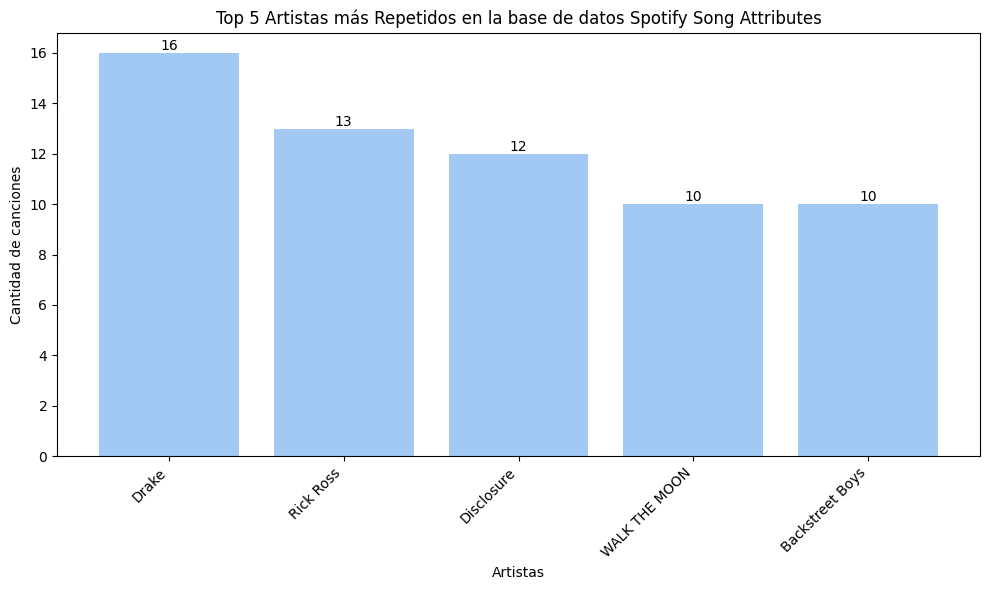

In [82]:
#grafico de barras con matplotlib

import matplotlib.pyplot as plt

# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(artistas, conteos)
plt.xlabel('Artistas')
plt.ylabel('Cantidad de canciones')
plt.title('Top 5 Artistas más Repetidos en la base de datos Spotify Song Attributes')
for i, v in enumerate(conteos):
    plt.text(i, v, str(v), ha='center', va='bottom') #etiquetas con los valores
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mejor legibilidad

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

Este gráfico es útil para comunicar de manera clara y concisa la frecuencia de los 5 artistas más repetidos en la base de datos "Spotify Song Attributes".



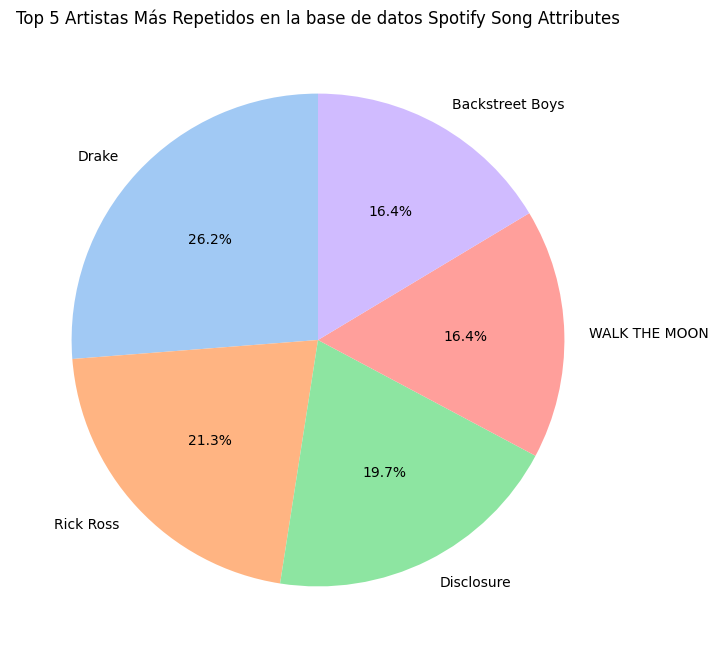

In [83]:
#ver la proporcion entre los 5 artistas mas mencionados en un grafico de torta usando Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Crea el gráfico de torta
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")  # Opcional: establece una paleta de colores pastel
plt.pie(conteos, labels=artistas, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Artistas Más Repetidos en la base de datos Spotify Song Attributes')
plt.show()

##Analizaremos al artista 'preferido' del autor del data set, poniendo el foco en las canciones de 'Drake'

In [26]:
#cuales son las canciones del artista mas mencionado
canciones_drake = df_2[df_2['artist'] == 'Drake']['song_title']
print(canciones_drake)

5                        Sneakin’
6                     Childs Play
37                        Jumpman
117                 Hotline Bling
154                     Big Rings
158                 Know Yourself
168               Wu-Tang Forever
440                     Headlines
589       Started From the Bottom
676     Hold On, We're Going Home
717     Hold On, We're Going Home
779       0 To 100 / The Catch Up
1016             Skepta Interlude
1183                 Passionfruit
1218              Best I Ever Had
1223                    Take Care
Name: song_title, dtype: object


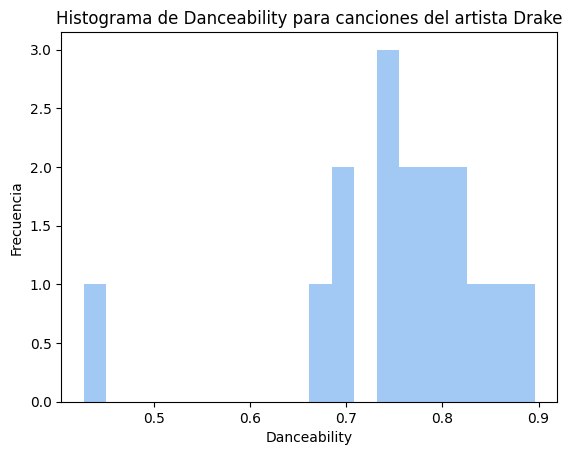

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Extrae los valores de 'danceability'
danceability_values = drake_songs['danceability'].tolist()

# Agrega un pequeño valor aleatorio a cada valor de 'danceability'
#danceability_values = np.array(danceability_values) + np.random.rand(len(danceability_values)) * 0.01

# Crea el histograma
plt.hist(danceability_values, bins=20)
plt.xlabel('Danceability')
plt.ylabel('Frecuencia')
plt.title('Histograma de Danceability para canciones del artista Drake')
plt.show()

Analizando el histograma de Danceability de las canciones de Drake se observa  una concentración de valores altos (hacia la derecha del gráfico), de modo que el insigh obtenido es que el artista Drake tiende a producir canciones con un alto grado de bailabilidad.

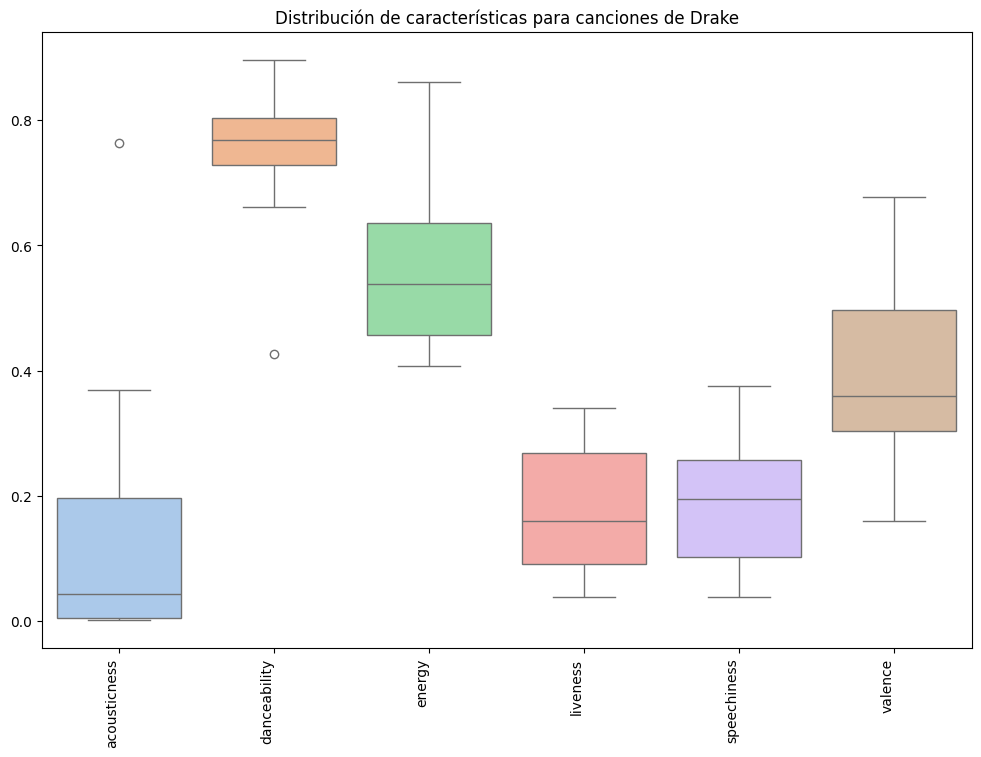

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas deseadas para el gráfico
columnas_deseadas_grafico = ['acousticness', 'danceability', 'energy',
                     'liveness',   'speechiness',   'valence']

# Convierte la lista de Series en un DataFrame, seleccionando solo las columnas deseadas
drake_df = pd.DataFrame(lista_series_drake)[columnas_deseadas_grafico]

# Crea el diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(data=drake_df)
plt.xticks(rotation=90, ha='right')
plt.title('Distribución de características para canciones de Drake')
plt.show()

Insights:
al comparar la distribución de las diferentes características se observa que la principal caracteristica de las canciones de Drake es que son bailables (mediana mas alta y rango pequeño) y en segundo lugar canciones energeticas (mediana alta)
No hay  canciones representadas por puntos fuera de los bigotes que permitan Identificar canciones atípicas
La dispersión de los datos en cada caja  da una idea de la variabilidad en cada característica del estilo musical de Drake. La caractiristica con valores mas bajos es 'acustico'.
en este grafico de histograma se observa la concordancia con la caracteristica 'bailable'(es donde mas se concentran los valores y donde se observan los valores mas altos y menos dispersos)

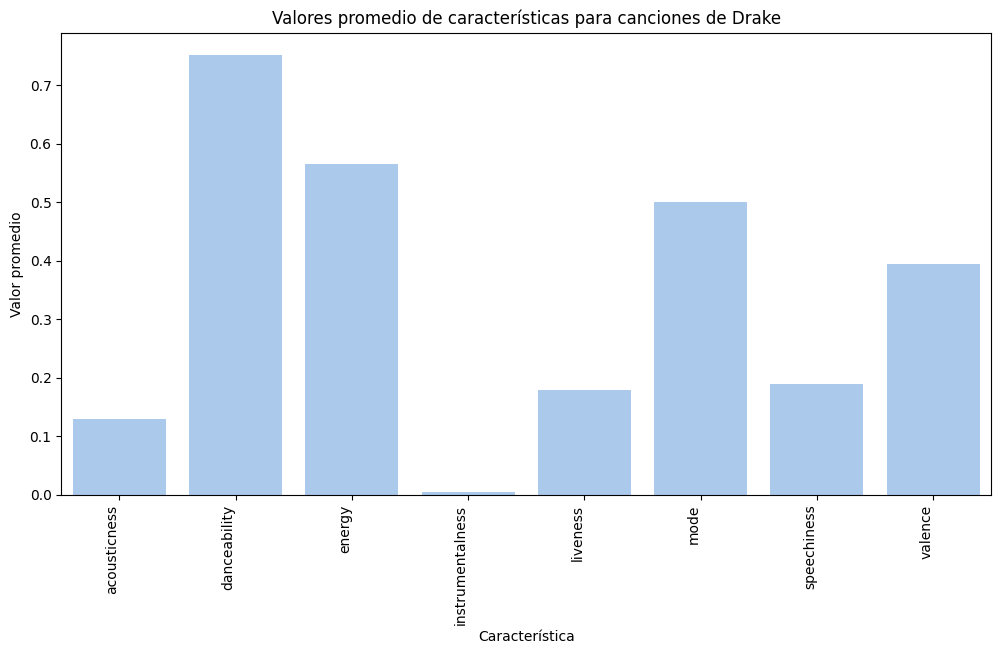

In [72]:
#distribucion de las caracteristicas de las canciones del artista mas mencionado
drake_songs = df_2[df_2['artist'] == 'Drake']
import seaborn as sns
import matplotlib.pyplot as plt

columnas_deseadas = ['acousticness', 'danceability',  'energy', 'instrumentalness',
                     'liveness',  'mode', 'speechiness',   'valence']

# Calcula el promedio de cada característica
promedios_drake = drake_songs[columnas_deseadas].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=promedios_drake.index, y=promedios_drake.values)
plt.xticks(rotation=90, ha='right')
plt.title('Valores promedio de características para canciones de Drake')
plt.ylabel('Valor promedio')
plt.xlabel('Característica')

plt.show()

en este grafico de barras (con los promedios de los valores de cada caracteristica) se puede interpretar juntamente con los dos graficos anteriores ( de histograma y el de barras). con los tres clases de grafico se infiere que la caracteristica 'bailable', es donde mas se concentran los valores y donde se observan los valores mas altos y menos dispersos.

ahora analizaremos las 16 canciones de Drake de acuerdo a las caracteristicas de 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness'

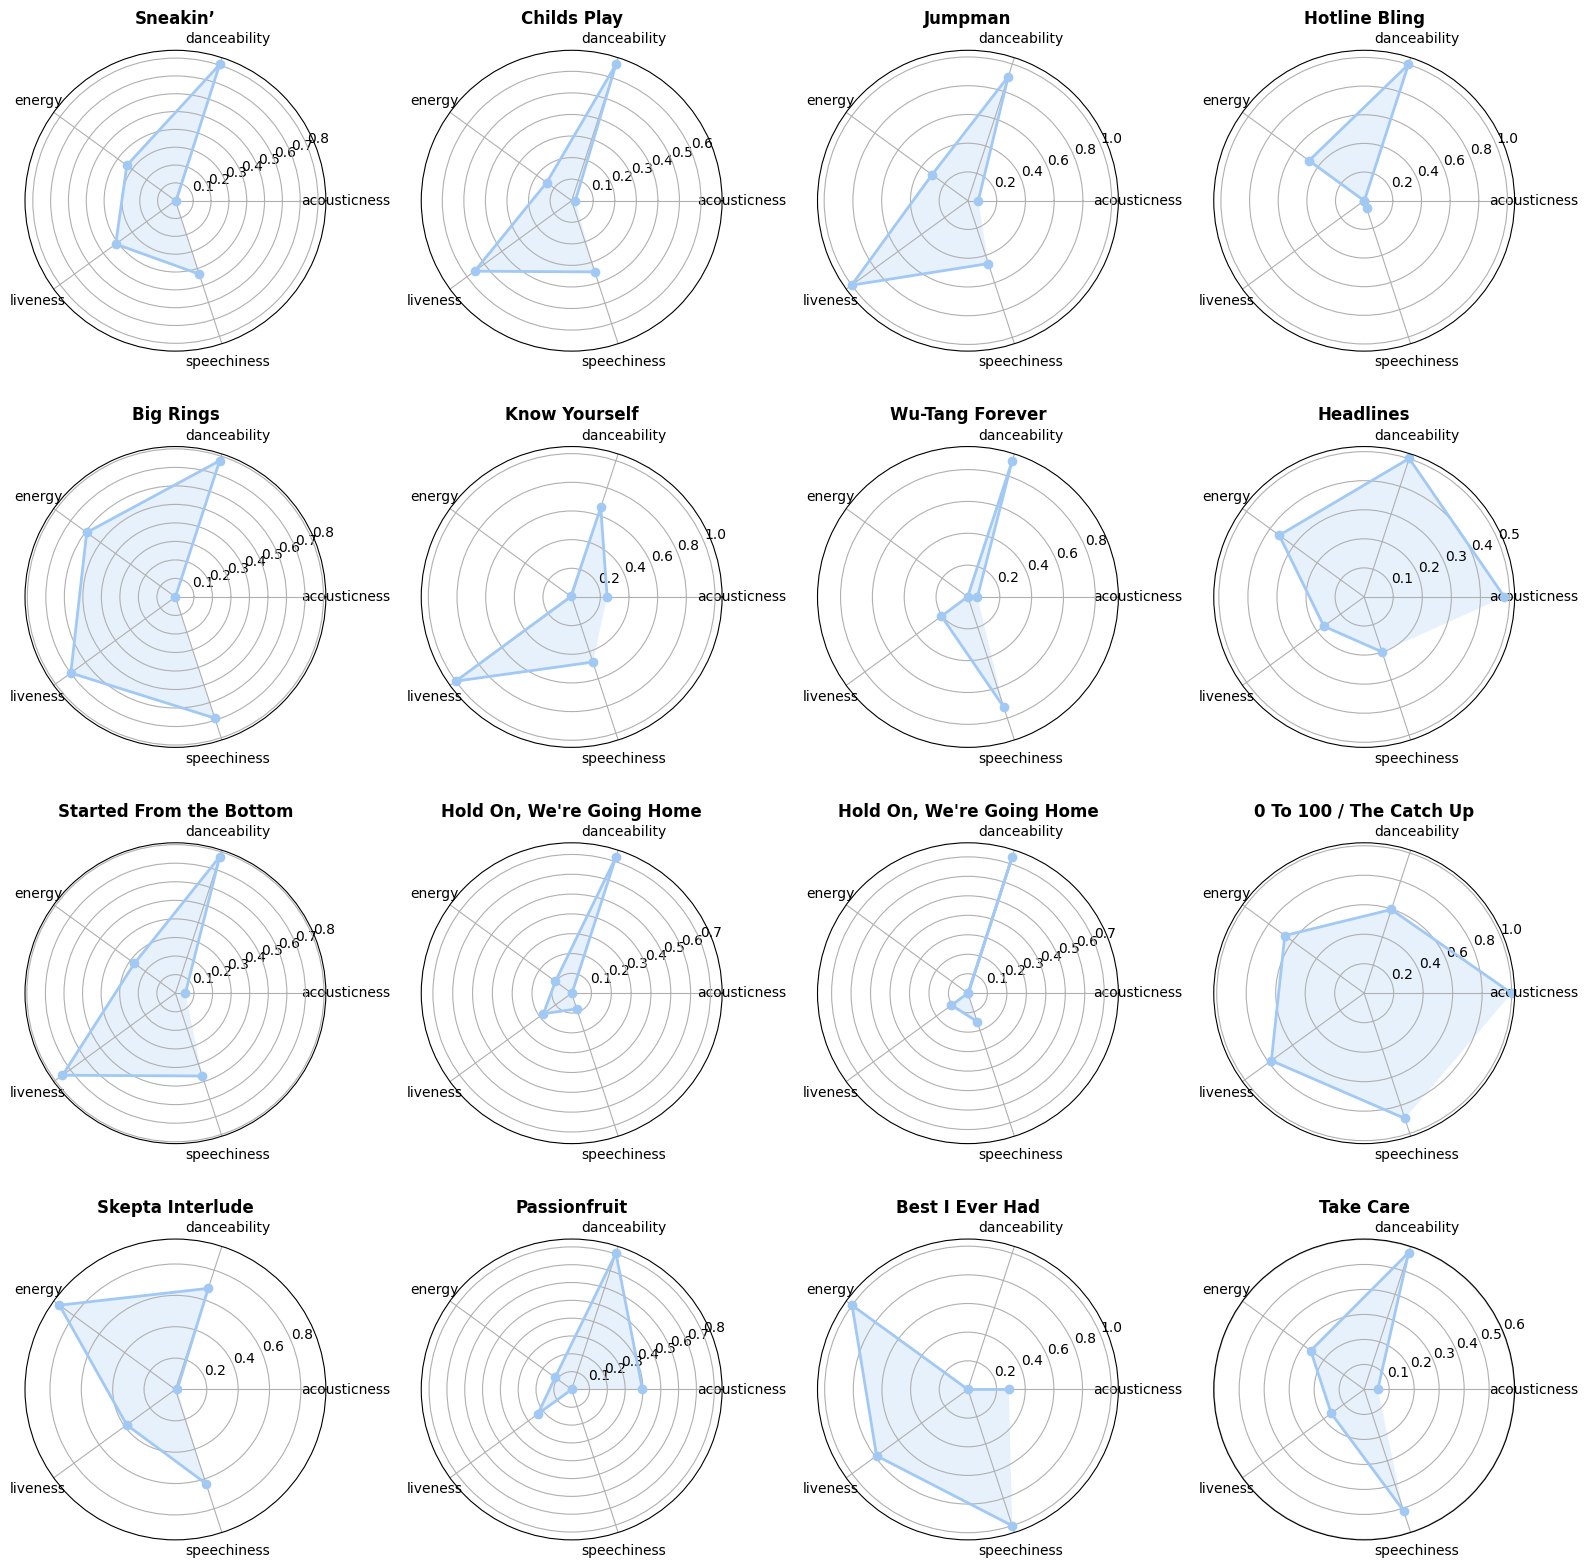

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Selecciona las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Extrae los valores de las características para las canciones de Drake
drake_data = df_2[df_2['artist'] == 'Drake'][columnas_deseadas]

# Normaliza los valores entre 0 y 1
drake_data_norm = (drake_data - drake_data.min()) / (drake_data.max() - drake_data.min())

# Crea los ángulos para el gráfico de araña
angulos = np.linspace(0, 2*np.pi, len(columnas_deseadas), endpoint=False)
angulos = np.concatenate((angulos, [angulos[0]]))  # Cierra el círculo

# Crea una cuadrícula de subplots (4 filas x 4 columnas)
fig, axes = plt.subplots(4, 4, figsize=(16, 16), subplot_kw=dict(polar=True))

# Itera sobre las canciones y crea los gráficos de radar
for i in range(len(drake_data_norm)):
    valores_cancion = drake_data_norm.iloc[i].values.tolist()
    valores_cancion += valores_cancion[:1]  # Cierra el círculo para cada canción

    # Obtén el título de la canción usando el índice
    titulo_cancion = df_2[df_2['artist'] == 'Drake']['song_title'].iloc[i]

    # Calcula la posición del subplot en la cuadrícula
    fila = i // 4
    columna = i % 4

    # Crea el gráfico de radar en el subplot correspondiente
    ax = axes[fila, columna]
    ax.plot(angulos[:-1], valores_cancion[:-1], 'o-', linewidth=2)
    ax.fill(angulos[:-1], valores_cancion[:-1], alpha=0.25)
    ax.set_thetagrids(angulos[:-1] * 180/np.pi, columnas_deseadas)
    ax.set_title(f'{titulo_cancion}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Al visualizar los 16 gráficos de radar de cada canción del artista Drake, se puede obtener informacion sobre:
La variabilidad de su estilo musical:  los gráficos tienen formas muy diferentes entre sí. Esto podría indicar que Drake experimenta con diferentes estilos musicales en sus canciones y donde la unica variable predominante  es 'bailable' ('danceability')
Las características predominantes en su música: la mayoría de las canciones de Drake tienen alta energía y bailabilidad . Podria afirmarse que su música es generalmente enérgica y bailable.
Canciones atípicas: el gráficos que se destaquen del resto por tener una forma o valores muy diferentes es el de la cancion Best I ever had (por ser la unica cancion 'no bailale'. Esta cancion podría representar experimento musical o desviacion de su estilo habitual. Siguiendo el correlato con los analisis realizados mediante los graficos anteriores (de barra e histograma) la caracteristica más observada para las canciones de Drake es 'bailables'.

Teniendo en cuenta que la variable 'bailable' se repite en los analisis efectuados, ahora desearia saber donde se concentran los datos haciendo un histograma para la base de datos bajo analisis. ¿será que al autor de la base de datos le suelen gustar canciones bailables en general? ¿o eso solo sucede con las canciones del grupo Drake -su grupo con mayor cantidad de canciones en la base de datos-?

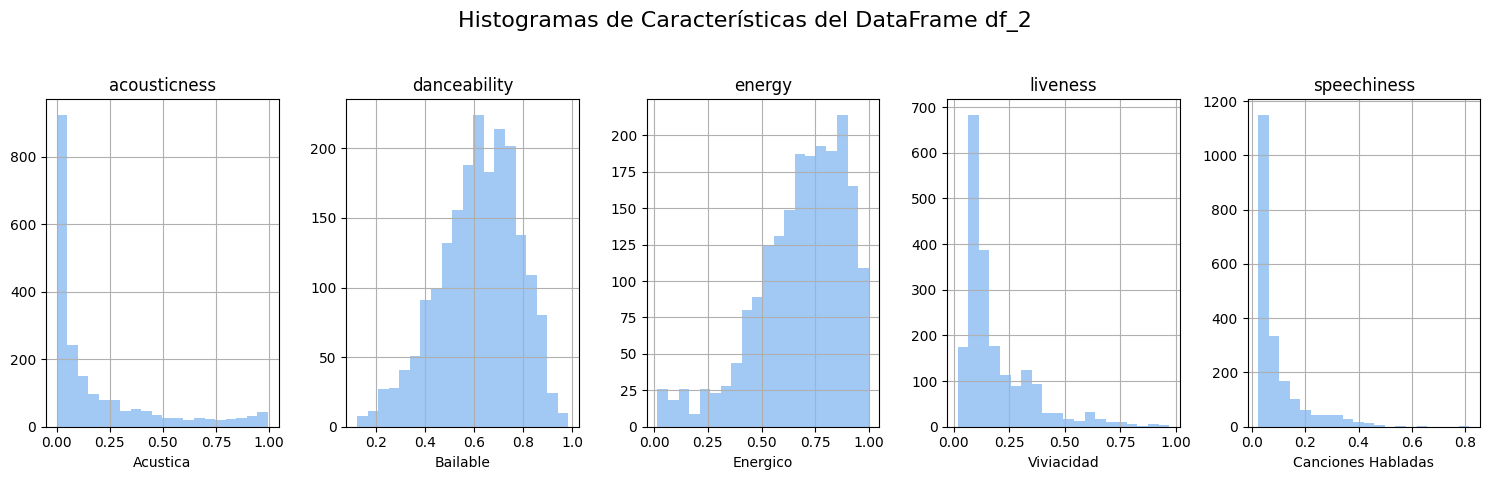

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecciona las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Crea el histograma
fig, axes = plt.subplots(1, len(columnas_deseadas), figsize=(15, 5))  # Crea subplots individuales
df_2[columnas_deseadas].hist(ax=axes, bins=20)

# Nuevos títulos
nuevos_titulos = ['Acustica', 'Bailable', 'Energico', 'Viviacidad', 'Canciones Habladas']

# Reemplaza los títulos de los gráficos
for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel(nuevos_titulos[i])

plt.suptitle('Histogramas de Características del DataFrame df_2', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Se puede inferir que, lo que sucede con las canciones de Drake tambien se replica para la mayoria de las canciones de la base de datos. Es decir que el autor de este data set tiende a preferir canciones bailables y energicas, con bajos valores para canciones acusticas, y habladas.

Veamos ahora si esto mismo sucede respecto de los 5 artistas mas repetidos en la base de datos, que ya habiamos obtenido mas arriba: artistas_top_5 = ['Drake', 'Rick Ross', 'Disclosure', 'WALK THE MOON', 'Backstreet Boys']


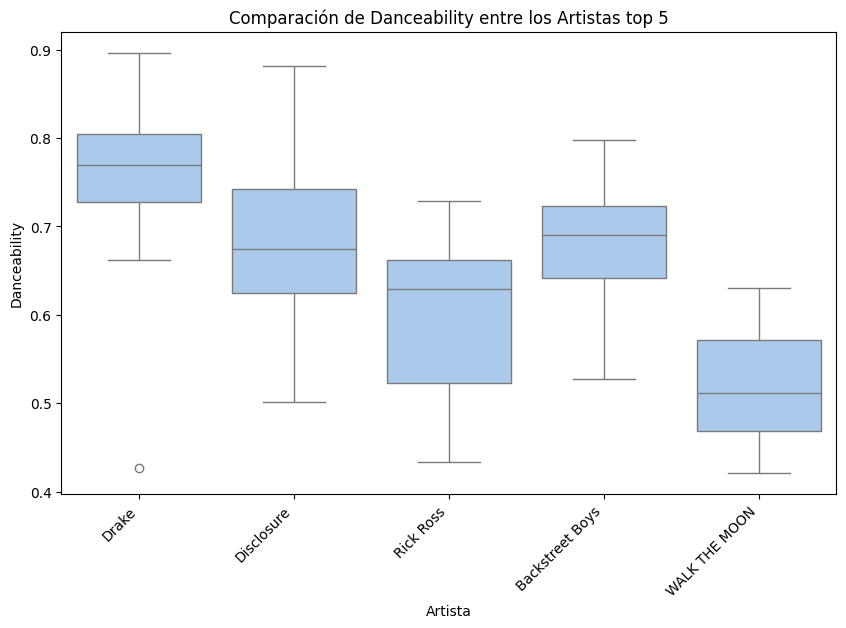

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Artistas más repetidos (top 5)
artistas_top = ['Drake', 'Rick Ross', 'Disclosure', 'WALK THE MOON', 'Backstreet Boys']

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas_top)]

# Crea el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='artist', y='danceability', data=df_filtrado)
plt.xticks(rotation=45, ha='right')
plt.title('Comparación de Danceability entre los Artistas top 5')
plt.xlabel('Artista')
plt.ylabel('Danceability')
plt.show()

Al comparar la mediana, los cuartiles y los valores atípicos de 'danceability' entre los artistas top 5, se observa variabilidad en el nivel de bailabilidad de sus canciones. Por lo tanto, si bien el autor tiene una tendencia hacia las canciones bailables considerando toda la base de datos, cuando se focaliza en los 5 artitas mas repetidos, la caracteristica bailable varia entre 0.8 (valor maximo para 'Drake') a 0,45 (valor minimo: para 'Walk The Moon').

Veamos el detalle de 'danceability' y 'energy' en un grafico de barras agrupadas para los 5 artistas más repetidos. Esto  permite visualizar la cantidad de canciones, así como los valores promedio de 'danceability' y 'energy' para cada artista.



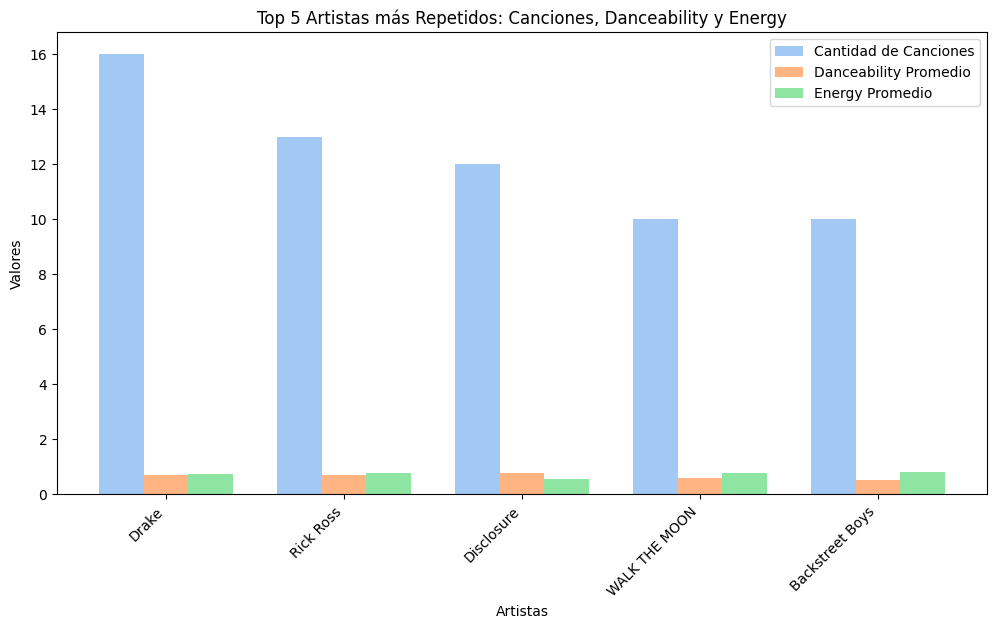

In [99]:
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones - ancho_barra, conteos, width=ancho_barra, label='Cantidad de Canciones')
ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=45, ha='right')
ax.set_xlabel('Artistas')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: Canciones, Danceability y Energy')
ax.legend()

#one hot encoding

In [100]:
import pandas as pd

# Identifica las variables categóricas
categorical_cols = df_2.select_dtypes(include=['object']).columns

# Evalúa la cardinalidad de cada variable categórica
for col in categorical_cols:
    print(f"Cardinalidad de {col}: {df_2[col].nunique()}")

# Realiza el one-hot encoding para variables con baja cardinalidad (por ejemplo, menos de 10 valores únicos)
low_cardinality_cols = [col for col in categorical_cols if df_2[col].nunique() < 10]
df_encoded = pd.get_dummies(df_2, columns=low_cardinality_cols)

# Para variables con alta cardinalidad, considera otras técnicas de codificación (por ejemplo, target encoding o embeddings)
# ...

Cardinalidad de song_title: 1956
Cardinalidad de artist: 1343


#no entiendo para que sirve el one hot encondig de las variables (luego de haber borrado song title y artits porque tienen alta cartinalidad)

In [104]:
# Elimina las columnas 'song_title' y 'artist'
df_sin_titulo_artista = df_2.drop(['song_title', 'artist'], axis=1)

# Identifica las variables categóricas restantes
categorical_cols = df_sin_titulo_artista.select_dtypes(include=['object']).columns

# Realiza el one-hot encoding para las variables categóricas restantes
df_encoded = pd.get_dummies(df_sin_titulo_artista, columns=categorical_cols)
df_encoded.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [105]:
matriz_correlacion = df_encoded.corr()

print(matriz_correlacion)

                  Unnamed: 0  acousticness  danceability  duration_ms  \
Unnamed: 0          1.000000      0.133055     -0.139615    -0.104185   
acousticness        0.133055      1.000000     -0.179894     0.071536   
danceability       -0.139615     -0.179894      1.000000     0.004695   
duration_ms        -0.104185      0.071536      0.004695     1.000000   
energy             -0.039880     -0.646319      0.038557    -0.144473   
instrumentalness   -0.104641      0.144397     -0.130561     0.305403   
key                -0.035611     -0.081037      0.022325     0.023570   
liveness           -0.039962     -0.117126     -0.132044     0.023203   
loudness            0.021935     -0.562021      0.104362    -0.273798   
mode                0.060639      0.068028     -0.047867    -0.074806   
speechiness        -0.135362     -0.099893      0.142661    -0.079562   
tempo              -0.027890     -0.127596     -0.143538    -0.076469   
time_signature     -0.053235     -0.190353      0.1

In [106]:
# Elimina las filas con valores faltantes
df_sin_faltantes = df_encoded.dropna()

print(df_sin_faltantes.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target  
0             4.0    0.286       1  
1             4.0    0.588       1  
2             4.0    0.173       1 

In [107]:
#eliminar las columnas con valores faltantes
df_sin_faltantes_columnas = df_encoded.dropna(axis=1)

print(df_sin_faltantes_columnas.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target  
0             4.0    0.286       1  
1             4.0    0.588       1  
2             4.0    0.173       1 

#p value

In [112]:
import pandas as pd
from scipy import stats

# Separate 'key' values based on 'target'
key_target_0 = df_2[df_2['target'] == 0]['key']
key_target_1 = df_2[df_2['target'] == 1]['key']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(key_target_0, key_target_1, equal_var=False)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation of p-value
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe una diferencia significativa entre  'key' y target.")
else:
    print("No podemos rechazar la hipótesis nula. No existe una diferencia significativa en key entre los target 1 y 0. ")

T-statistic: -1.5090298091786953
P-value: 0.13144795897480893
No podemos rechazar la hipótesis nula. No existe una diferencia significativa en key entre los target 1 y 0. 


##INSIGHT
Here's an explanation of the t-test results and the insights you can gain:

T-statistic: -1.5090298091786953

This value measures the difference between the means of the two groups (songs with target 0 and songs with target 1) in terms of the 'key' variable, relative to the variability within each group.
The negative sign indicates that the mean 'key' value for the target 0 group is slightly lower than the mean for the target 1 group. However, the magnitude of the t-statistic is not very large.
P-value: 0.13144795897480893

This value represents the probability of observing a difference in 'key' between the two target groups as extreme as the one you found (or even more extreme), assuming that there is actually no difference in the population.
In this case, the p-value is relatively high (greater than the common significance level of 0.05).
Fail to reject null hypothesis: There is no significant difference in 'key' between the two target groups.

This conclusion means that, based on the data you have, there is not enough evidence to say that the 'key' of songs is significantly different between the two target groups.
In other words, the observed difference in mean 'key' values could likely be due to random chance rather than a true underlying difference.
Insight:

The main insight you gain is that the musical key doesn't seem to be a strong factor in determining the 'target' variable in your dataset. This suggests that other features might be more important predictors of the target.

Further Considerations:

Effect Size: While the t-test indicates no significant difference, it might be helpful to consider the effect size (the magnitude of the difference between the groups) to see if there is a practically meaningful difference, even if it's not statistically significant.
Other Variables: Explore the relationship between other variables and the 'target' to identify potential predictors.
Assumptions: Remember that the t-test relies on certain assumptions (e.g., normality of data within each group). If these assumptions are violated, the results might not be reliable.
By combining statistical analysis with domain knowledge, you can gain a deeper understanding of your data and make informed decisions.

In [113]:
import pandas as pd
from scipy.stats import ttest_ind

# Divide el dataframe en dos grupos basados en el valor de target
grupo_0 = df_encoded[df_encoded['target'] == 0]['danceability']
grupo_1 = df_encoded[df_encoded['target'] == 1]['danceability']

# Realiza el t-test independiente
t_statistic, p_value = ttest_ind(grupo_0, grupo_1)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -8.058923078730047
P-value: 1.3051748098692587e-15


Este código primero crea dos series de Pandas, grupo_0 y grupo_1, que contienen los valores de 'danceability' para las filas donde el target es 0 y 1, respectivamente. Luego, aplica la función ttest_ind para realizar el t-test independiente y obtener el t-statistic y el p-value.

El t-statistic mide la diferencia entre las medias de los dos grupos, mientras que el p-value indica la probabilidad de observar una diferencia tan grande o mayor si no hubiera una diferencia real entre las medias de las poblaciones.

Si el p-value es menor que un nivel de significancia predefinido (por ejemplo, 0.05), puedes rechazar la hipótesis nula de que no hay diferencia entre las medias de los dos grupos y concluir que hay una diferencia significativa en 'danceability' entre las canciones con target 0 y 1.

#insight obtenido:
 Los resultados del t-test que obtuviste indican lo siguiente:

T-statistic: -8.058923078730047: Este valor negativo indica que la media de 'danceability' para las canciones con target 0 es menor que la media de 'danceability' para las canciones con target 1. La magnitud del valor (8.05) sugiere una diferencia considerable entre las medias.

P-value: 1.3051748098692587e-15: Este valor extremadamente pequeño (prácticamente cero) indica que es muy poco probable observar una diferencia tan grande o mayor entre las medias de 'danceability' si no hubiera una diferencia real entre las poblaciones de canciones con target 0 y 1.

En otras palabras, los resultados del t-test sugieren fuertemente que hay una diferencia significativa en la característica 'danceability' entre las canciones con target 0 y 1. La diferencia es estadísticamente significativa, lo que significa que es muy poco probable que sea debida al azar.

Interpretación en el contexto de tu análisis:

La interpretación específica de estos resultados dependerá del significado de la variable target en tu dataset.
#Sin embargo, en general, puedes concluir que las canciones con target 1 tienden a tener un valor de 'danceability' más alto que las canciones con target 0.

Recuerda que el t-test solo evalúa la diferencia en las medias. Para una comprensión más completa de la relación entre 'danceability' y el target, podrías considerar visualizar la distribución de 'danceability' para cada grupo (por ejemplo, con histogramas o diagramas de caja) y explorar otras medidas estadísticas como la desviación estándar.

#bokeh

In [116]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

# Divide el dataframe en dos grupos basados en el valor de target
grupo_0 = df_encoded[df_encoded['target'] == 0]['danceability']
grupo_1 = df_encoded[df_encoded['target'] == 1]['danceability']

# Crea un ColumnDataSource para cada grupo
source_0 = ColumnDataSource(data=dict(danceability=grupo_0))
source_1 = ColumnDataSource(data=dict(danceability=grupo_1))

# Configura la salida para mostrar el gráfico en el notebook
output_notebook()

# Crea la figura
p = figure(title="Distribución de Danceability por Target", x_axis_label='Danceability', y_axis_label='Frecuencia')

# Crea los histogramas
hist_0, edges_0 = np.histogram(grupo_0, bins=20)
p.quad(top=hist_0, bottom=0, left=edges_0[:-1], right=edges_0[1:], fill_color="blue", line_color="white", alpha=0.5, legend_label="Target 0")

hist_1, edges_1 = np.histogram(grupo_1, bins=20)
p.quad(top=hist_1, bottom=0, left=edges_1[:-1], right=edges_1[1:], fill_color="red", line_color="white", alpha=0.5, legend_label="Target 1")

# Agrega un HoverTool para mostrar información al pasar el mouse
hover = HoverTool(tooltips=[("Danceability", "@danceability"), ("Frecuencia", "$y")])
p.add_tools(hover)
show(p)

Este código creará dos histogramas interactivos, uno para cada grupo de target, mostrando la distribución de 'danceability'. Podrás interactuar con el gráfico para obtener más información sobre cada barra.



#Danceability  vs. Energy
Un diagrama de dispersión con 'danceability' en el eje x y 'energy' en el eje y puede mostrar si existe una relación entre estas dos características.



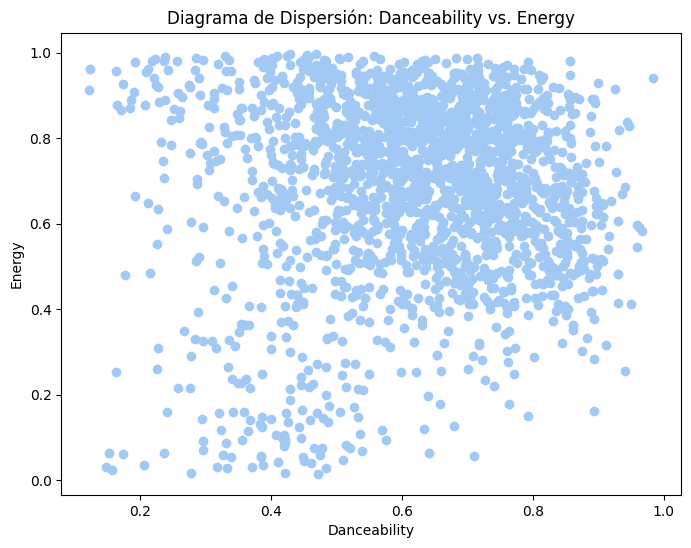

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['danceability'], df_2['energy'])
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Diagrama de Dispersión: Danceability vs. Energy')
plt.show()

Danceability vs.

acousticness: Explora si existe una relación inversa, es decir, si las canciones más bailables tienden a ser menos acústicas.

duration_ms: Analiza si la duración de una canción influye en su bailabilidad. ¿Las canciones más largas o más cortas tienden a ser más bailables?

instrumentalness: Observa si las canciones con mayor presencia de instrumentos (y menos voces) tienden a ser más o menos bailables.

key: Investiga si ciertas tonalidades musicales están asociadas con una mayor bailabilidad.

liveness: Explora si las canciones grabadas en vivo tienden a ser más o menos bailables que las grabadas en estudio.

loudness: Analiza si el volumen de una canción influye en su bailabilidad. ¿Las canciones más fuertes o más suaves tienden a ser más bailables?

mode: Compara la bailabilidad entre canciones en modo mayor y modo menor. ¿Existe alguna tendencia?

speechiness: Observa si las canciones con mayor contenido hablado tienden a ser menos bailables.

tempo: Analiza la relación entre el tempo (velocidad) de una canción y su bailabilidad. ¿Las canciones más rápidas o más lentas tienden a ser más bailables?

time_signature: Explora si el compás (time signature) de una canción influye en su bailabilidad.

valence: Investiga la relación entre la positividad (valence) de una canción y su bailabilidad. ¿Las canciones más alegres o más tristes tienden a ser más bailables?

target: Si 'target' representa alguna característica binaria (por ejemplo, éxito comercial), puedes comparar la bailabilidad entre las canciones que tienen target 0 y 1.


Recuerda que estas son solo sugerencias, y la mejor manera de explorar estas relaciones dependerá de tus objetivos de análisis y de las características específicas de tu dataset.

Puedes usar diferentes tipos de gráficos (diagramas de dispersión, histogramas, boxplots, etc.) y técnicas estadísticas para obtener insights más profundos.

¡Espero que esto te ayude a encontrar nuevas comparaciones interesantes!


# **DATA BASE N° 3 DATA SET DE SPOTIFY**

Descripción: Este conjunto de datos contiene una colección de canciones obtenidas de la API de Spotify, cubriendo varios géneros, incluyendo “acoustic” (acústico),  “alt-rock” (rock alternativo), “bossanova”, “country” (country), “dance” (baile),  “disco”,  “electronic” (electrónica), “reggae”, “reggaeton”, “road-trip” (viaje por carretera), “rock”, “rock-n-roll”, “rockabilly”, “romance”, “sad” (triste), “salsa”, “samba”, “tango” entre otras.

Cada entrada en el conjunto de datos proporciona información detallada sobre una canción, incluyendo su nombre, artistas, álbum, popularidad, duración y si es explícita.

Descripción de las Columnas:

id: Identificador único de la canción en Spotify.
name: Nombre de la canción.
genre: Género de la canción.
artists: Nombres de los artistas que interpretan la canción, separados por comas si hay múltiples artistas.
album: Nombre del álbum al que pertenece la canción.
popularity: Puntuación de popularidad de la canción (0-100, donde un valor más alto indica mayor popularidad).
duration_ms: Duración de la canción en milisegundos.
explicit: Booleano que indica si la canción contiene contenido explícito.

POSIBLES ANALISIS:
1. los 10 artistas mas escuchados
2. las 10 canciones con mayor duracion
3. ranking con las canciones con mejor puntaje de popularidad
4. distribucion de canciones segun decada
5. caracterizar el grupo de las canciones mas populares segun danceability	energy	y  key.
6. heat map de variables


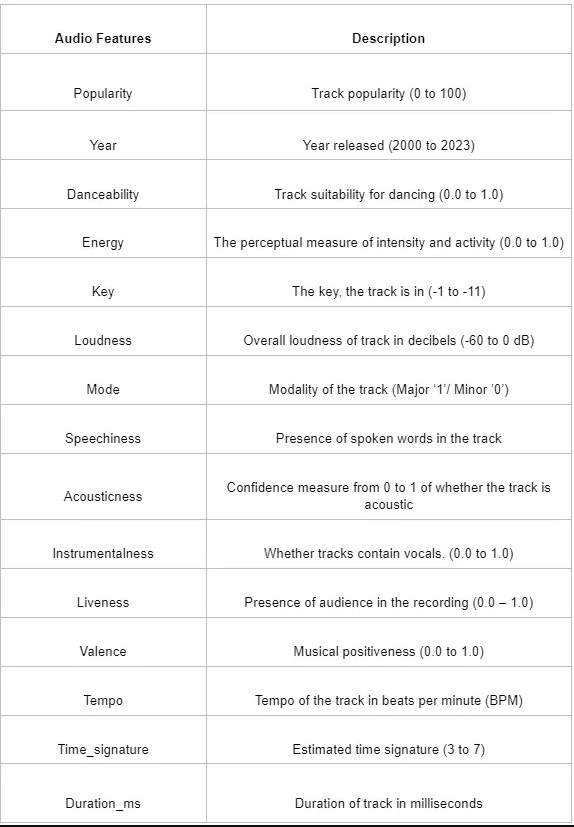





In [4]:
import pandas as pd
df_3 = pd.read_csv('/content/PPL_ALTAS/spotify_dataset.csv')

In [5]:
# Leo el dataset
df_3.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


ANALISIS DEL DATA SET

en primer lugar, aplicar metodos para tener una descripcion general del data set

In [ ]:
df_3.shape

(41099, 20)

In [ ]:
df_3.decade.unique()

array(['60s', '70s', '80s', '90s', '00s', '10s'], dtype=object)

In [ ]:

column_names = df_3.columns

# Imprimir los nombres de las columnas
print(column_names)

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'popularity', 'decade'],
      dtype='object')


In [ ]:
# Usando el método unique me devuelve los valores únicos o diferentes que hay en el df, en orden de aparición

df_3['artist'].unique()

array(['Garland Green', 'Serge Gainsbourg', 'Lord Melody', ...,
       'Regentum', 'Liam Payne Featuring Quavo', 'The Neighbourhood'],
      dtype=object)

In [ ]:
#verificar si hay valores nulos en alguna columna
df_3.isnull().sum()

,0
track,0
artist,0
uri,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0


In [ ]:
df_3.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
count,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,4.109900e+04,41099.000000,41099.000000,41099.000000,41099.000000
mean,0.539683,0.579544,5.213752,-10.221446,0.693375,0.072952,0.364232,0.154403,0.201534,0.542450,119.336349,2.348755e+05,3.893647,40.106896,10.475632,0.499964
std,0.177808,0.252629,3.535060,5.311227,0.461098,0.086106,0.338908,0.303518,0.172957,0.267333,29.099116,1.189696e+05,0.423072,19.006697,4.872026,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816500,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.395500,1.729165e+05,4.000000,27.599510,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.559000,117.564000,2.179070e+05,4.000000,35.850270,10.000000,0.000000
75%,0.669000,0.787000,8.000000,-6.375000,1.000000,0.069800,0.676000,0.061200,0.261000,0.768000,136.492000,2.667730e+05,4.000000,47.627240,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [ ]:
df_3.describe(include='object')

,track,artist,uri,decade
count,41099,41099,41099,41099
unique,35853,11902,40553,6
top,Falling,Traditional,spotify:track:0wz1LjDb9ZNEYwOmDJ3Q4b,60s
freq,17,207,3,8642



**LOS 10 ARTISTAS MAS ESCUCHADOS**




In [6]:
nueva_tabla = ds_3[['artist', 'decade']]
print(nueva_tabla)

,Artista,Cantidad
0,Traditional,207
1,Harry Belafonte,140
2,P. Susheela,130
3,Ennio Morricone,128
4,Jerry Goldsmith,124
...,...,...
11897,Voyce,1
11898,Johnny Laboriel,1
11899,Tribe 8,1
11900,Albert Burbank,1


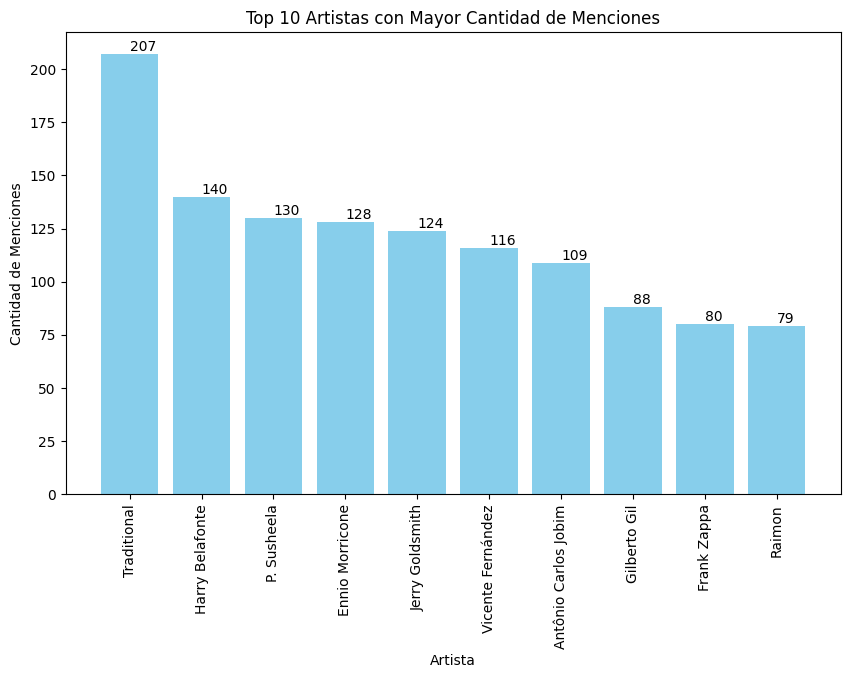

In [ ]:
# Ordenar el DataFrame por la cantidad de menciones en orden descendente
df_top_10_artists = df_3_artists.sort_values(by='Cantidad', ascending=False)

# Seleccionar los 10 artistas con más menciones
df_top_10_artists = df_top_10_artists.head(10)

# Visualizar los datos en un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_top_10_artists['Artista'], df_top_10_artists['Cantidad'], color='skyblue')

# Agregar etiquetas con los valores en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va='bottom' para colocar la etiqueta encima de la barra

plt.xlabel('Artista')
plt.ylabel('Cantidad de Menciones')
plt.title('Top 10 Artistas con Mayor Cantidad de Menciones')
plt.xticks(rotation=90)
plt.show()

**las 10 canciones con mayor duracion**
gráficos diferentes con Matplotlib


In [1]:
top_20 = df_3.nlargest(20, 'duration_ms')

# Función para convertir milisegundos a minutos y segundos
def ms_to_min_sec(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    return f'{minutes}:{seconds:02d}'

# Crear el gráfico
plt.figure(figsize=(12, 10))
bars = plt.barh(top_20['track'], top_20['duration_ms'], color='skyblue')

# Añadir etiquetas con la duración y el nombre del artista dentro de la barra
for bar, duration, artist in zip(bars, top_20['duration_ms'], top_20['artist']):
    plt.text(bar.get_width() - 50000, bar.get_y() + bar.get_height()/2 + 0.15,
             f'{ms_to_min_sec(duration)}',
             va='center', ha='right', fontsize=10, fontweight='bold', color='white')
    plt.text(bar.get_width() - 50000, bar.get_y() + bar.get_height()/2 - 0.15,
             f'{artist}',
             va='center', ha='right', fontsize=8, color='black')

plt.xlabel('Duración (ms)')
plt.ylabel('Canción')
plt.title('Top 20 Canciones por Duración')
plt.gca().invert_yaxis()  # Invertir el eje y para que la canción más larga esté arriba
plt.show()

NameError: name 'df_3' is not defined

calcular el promedio de duracion de las canciones del data set

---



In [ ]:
# Calcular la duración promedio en milisegundos
duracion_promedio_ms = df_3['duration_ms'].mean()

# Convertir la duración promedio a minutos y segundos
duracion_promedio_min = duracion_promedio_ms // 60000
duracion_promedio_seg = (duracion_promedio_ms % 60000) // 1000

print(f'Duración promedio: {duracion_promedio_min:.0f} minutos y {duracion_promedio_seg:.0f} segundos')

Duración promedio: 3 minutos y 54 segundos


In [ ]:
# Ordenar el DataFrame por la cantidad de menciones en orden descendente
df_top_10_artists = df_3_artists.sort_values(by='Cantidad', ascending=False)

# Seleccionar los 10 artistas con más menciones
df_top_10_artists = df_top_10_artists.head(10)

df_top_10_artists

,Artista,Cantidad
0,Traditional,207
1,Harry Belafonte,140
2,P. Susheela,130
3,Ennio Morricone,128
4,Jerry Goldsmith,124
5,Vicente Fernández,116
6,Antônio Carlos Jobim,109
7,Gilberto Gil,88
8,Frank Zappa,80
9,Raimon,79


In [ ]:
# Filter the DataFrame for the artist 'Traditional'
traditional_df = df_3[df_3['artist'] == 'Traditional']

# Group the filtered DataFrame by 'decade' and count the occurrences
traditional_by_decade = traditional_df.groupby('decade')['artist'].count()
traditional_by_decade

,artist
decade,
60s,167
70s,40


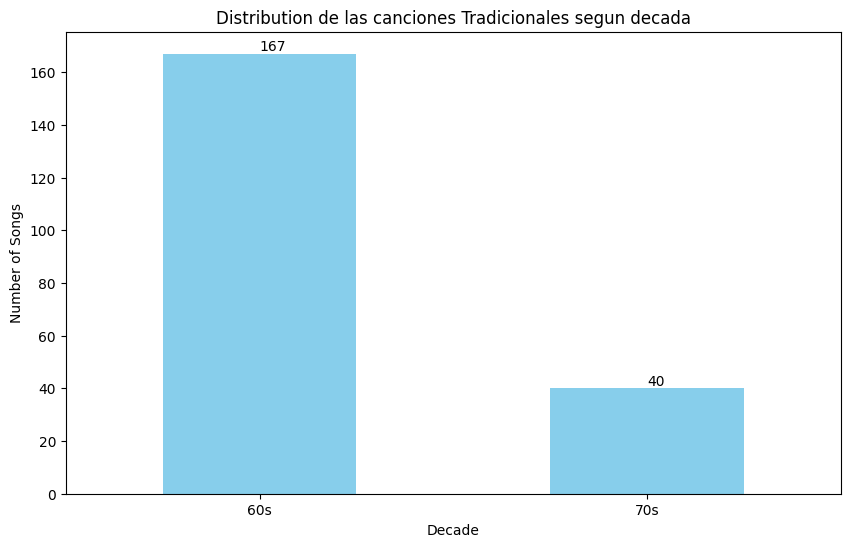

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = traditional_by_decade.plot(kind='bar', color='skyblue')  # Assign the plot to 'bars'
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.title('Distribution de las canciones Tradicionales segun decada')
plt.xticks(rotation=0)

# Add value labels to the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.show()


**ordenar las canciones mas bailables**
matplotlib



In [ ]:
# Sort the DataFrame by 'danceability' in descending order
sorted_df = df_3.sort_values(by='danceability', ascending=False)

# Iterate through the first 25 rows and print track, danceability, and decade
count = 0
for index, row in sorted_df.iterrows():
    if count >= 25:
        break
    track_name = row['track']
    danceability_value = row['danceability']
    decade_value = row['decade']  # Extract the decade value
    print(f"Track: {track_name}, Danceability: {danceability_value}, Decade: {decade_value}")
    count += 1

Track: Funky Cold Medina, Danceability: 0.988, Decade: 80s
Track: Go Girl, Danceability: 0.986, Decade: 00s
Track: Cash Me Outside (#CashMeOutside), Danceability: 0.981, Decade: 10s
Track: Ice Ice Baby, Danceability: 0.98, Decade: 10s
Track: State of Shock, Danceability: 0.98, Decade: 80s
Track: Ice Ice Baby, Danceability: 0.979, Decade: 90s
Track: Give It To Me, Danceability: 0.978, Decade: 00s
Track: Butt Naked, Danceability: 0.978, Decade: 80s
Track: Uno, Danceability: 0.978, Decade: 10s
Track: Barney Theme Song, Danceability: 0.976, Decade: 90s
Track: Bad Bad Bad, Danceability: 0.974, Decade: 10s
Track: In Da Wind, Danceability: 0.974, Decade: 00s
Track: Lil Baby, Danceability: 0.974, Decade: 10s
Track: Make Love, Danceability: 0.972, Decade: 10s
Track: One And One, Danceability: 0.97, Decade: 80s
Track: Trap Keys, Danceability: 0.969, Decade: 10s
Track: Freedom - Disco Dub, Danceability: 0.968, Decade: 10s
Track: Drip, Danceability: 0.968, Decade: 10s
Track: Nin-com-pop - T.leboeg

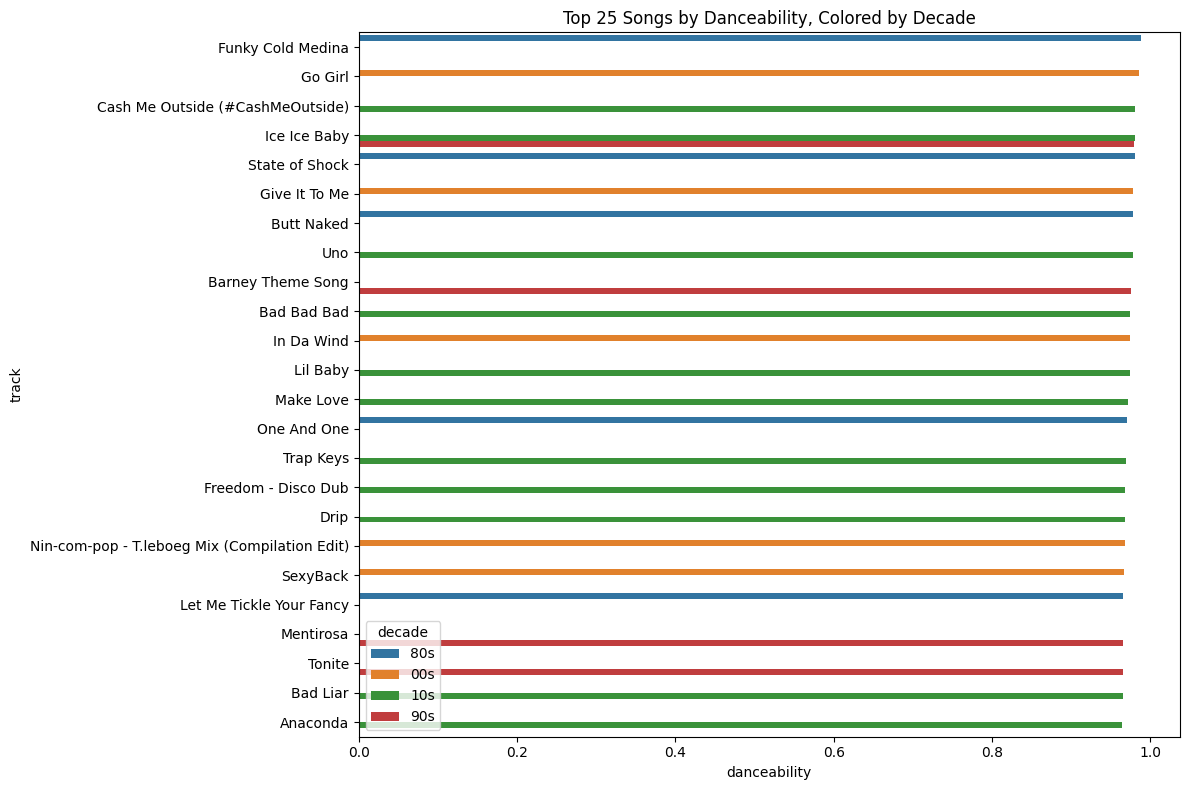

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sort the DataFrame by 'danceability' in descending order
sorted_df = df_3.sort_values(by='danceability', ascending=False)

# Select the top 25 songs
top_25_df = sorted_df.head(25)  # This line creates the top_25_df DataFrame
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, y='track', x='danceability', hue='decade')
plt.title('Top 25 Songs by Danceability, Colored by Decade')
plt.tight_layout()
plt.show()

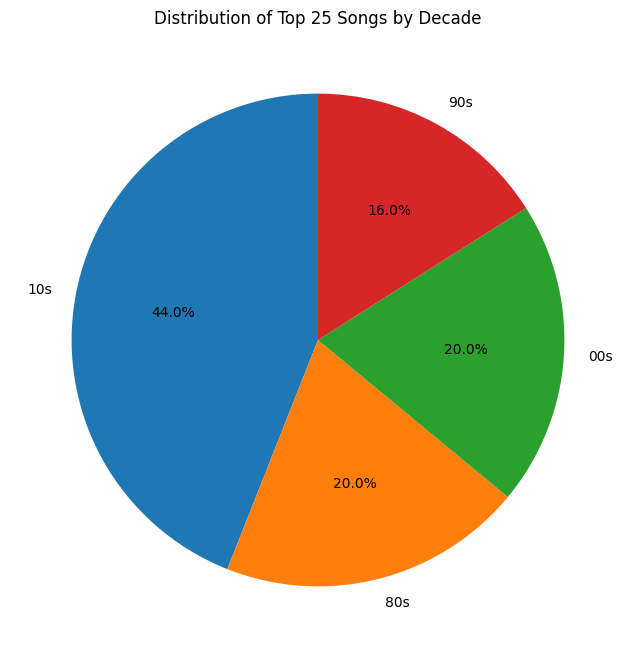

In [ ]:
# Assuming 'top_25_df' contains your top 25 songs
decade_counts = top_25_df['decade'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(decade_counts, labels=decade_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 25 Songs by Decade')
plt.show()

correlacion de cada variable con 'decada'


In [ ]:

# Convert 'decade' to numerical representation (if needed)
df_3['decade_numeric'] = df_3['decade'].astype('category').cat.codes

# Select only numerical columns
numerical_df = df_3.select_dtypes(include=['number'])

# Calculate correlations with 'decade_numeric'
correlations = numerical_df.corr()['decade_numeric']
correlations

,decade_numeric
danceability,0.039455
energy,-0.092950
key,-0.000578
loudness,-0.207967
mode,0.020566
speechiness,-0.117062
acousticness,0.047204
instrumentalness,-0.004117
liveness,0.000240
valence,0.131105


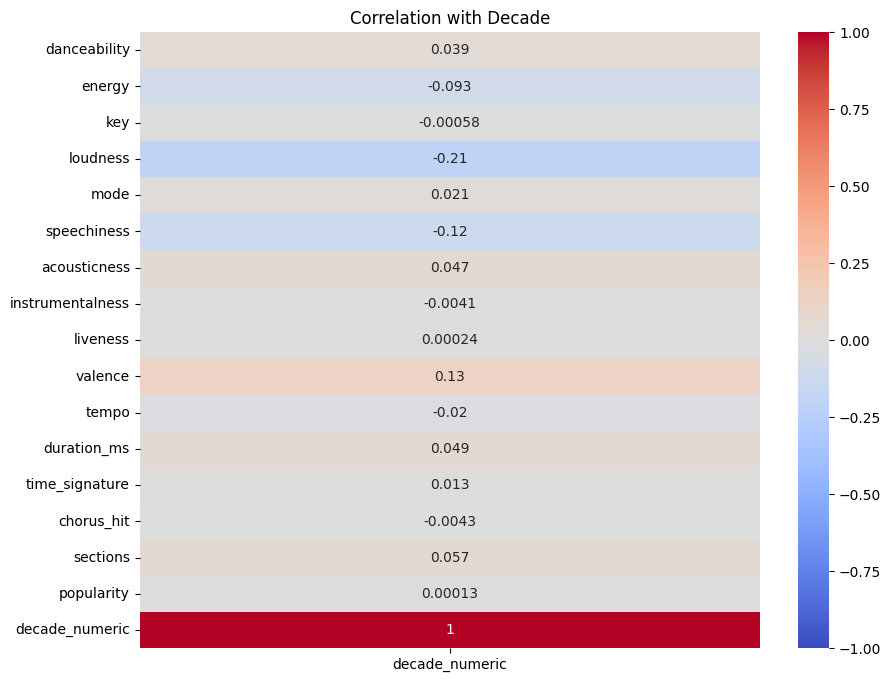

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Decade')
plt.show()

se infiere que las variables con mayor correlacion respecto de la categoria DECADA, son las de valencia (correlacion positiva: es decir que a medida que aumenta la decada, el valor 'valence' tiende a aumentar) y la de ´loudness´ correlacion negativa. a medida que la decada aumenta, el valor loudnes tiende a disminuir)

Relacion con la variable REGISTRO

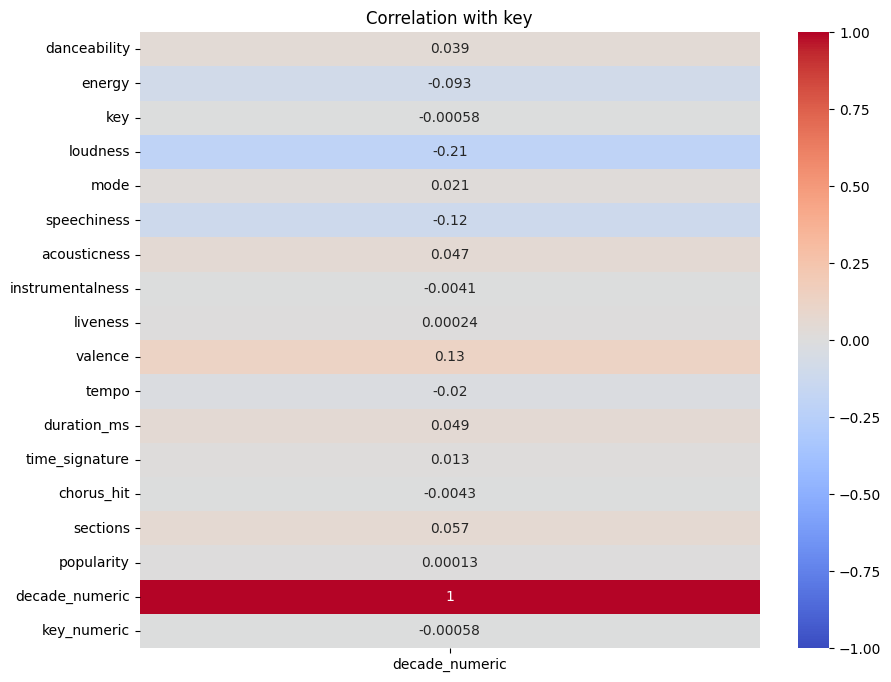

In [ ]:
# Convert 'key' to numerical representation (if needed)
df_3['key_numeric'] = df_3['key'].astype('category').cat.codes

# Select only numerical columns
numerical_df = df_3.select_dtypes(include=['number'])

# Calculate correlations with 'decade_numeric'
correlations = numerical_df.corr()['decade_numeric']
correlations

plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with key')
plt.show()


se infiere que la variable con mayor correlacion respecto de la categoria KEY ('registro'),  y la de ´loudness´ correlacion negativa. a medida que el registro aumenta, el valor loudnes tiende a disminuir)

In [ ]:
# Get data types of each column
column_types = df_3.dtypes

# Print categorical columns
for column, dtype in column_types.items():
    if dtype == 'object':
        print(column)

track
artist
uri
decade


In [ ]:
# Select categorical columns with a reasonable cardinality for one-hot encoding
categorical_cols = ['artist', 'track']  # Adjust this based on your data

# Perform one-hot encoding
df_onehot = pd.get_dummies(df_3, columns=categorical_cols, drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_onehot.corr()

print(corr_matrix.head())
print(df_onehot.shape)

ValueError: could not convert string to float: 'spotify:track:1dtKN6wwlolkM8XZy2y9C1'

ahora ordenar las 10 mejores artistas obtenidas y agruparlas segun la decada

> Agregar bloque entrecomillado



In [ ]:
 #Group by 'decade' and 'key', and count the number of occurrences for each artist
grouped_data = df_top_10.groupby(['decade', 'key'])['artist'].value_counts().reset_index(name='count')

# Pivot the table, aggregating duplicate entries by summing the counts
grouped_data = grouped_data.pivot_table(index='decade', columns='key', values='count', aggfunc='sum').fillna(0)

# Seleccionar los 10 artistas con más menciones
df_top_10_artists = df_top_10_artists.head(10)

# Assuming df_top_10_artists contains the top 10 artists and their counts
top_10_artist_names = df_top_10_artists['Artista'].tolist()

# Filter the original dataframe to include only the top 10 artists
df_top_10 = df_3[df_3['artist'].isin(top_10_artist_names)]

# Group by 'decade' and 'key', and count the number of occurrences for each artist
grouped_data = df_top_10.groupby(['decade', 'key'])['artist'].value_counts().unlevel(fill_value=0).unstack(fill_value=0)


AttributeError: 'Series' object has no attribute 'unlevel'

In [ ]:
# Seleccionar los 10 artistas con más menciones
df_top_10_artists = df_top_10_artists.head(10)

# Assuming df_top_10_artists contains the top 10 artists and their counts
top_10_artist_names = df_top_10_artists['Artista'].tolist()

# Filter the original dataframe to include only the top 10 artists
df_top_10 = df_3[df_3['artist'].isin(top_10_artist_names)]

# Group by 'decade' and 'key', and count the number of occurrences for each artist
grouped_data = df_top_10.groupby(['decade', 'key'])['artist'].value_counts().unlevel(fill_value=0).unstack(fill_value=0)

AttributeError: 'Series' object has no attribute 'unlevel'

In [ ]:
df_top_10_artists = df_3_artists.sort_values(by='Cantidad', ascending=False)

# Seleccionar los 10 artistas con más menciones
df_top_10_artists = df_top_10_artists.head(10)






# Visualizar los datos en un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_top_10_artists['Artista'], df_top_10_artists['Cantidad'], color='skyblue')

# Agregar etiquetas con los valores en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va='bottom' para colocar la etiqueta encima de la barra

plt.xlabel('Artista')
plt.ylabel('Cantidad de Menciones')
plt.title('Top 10 Artistas con Mayor Cantidad de Menciones')
plt.xticks(rotation=90)
plt.show()

IndexError: single positional indexer is out-of-bounds

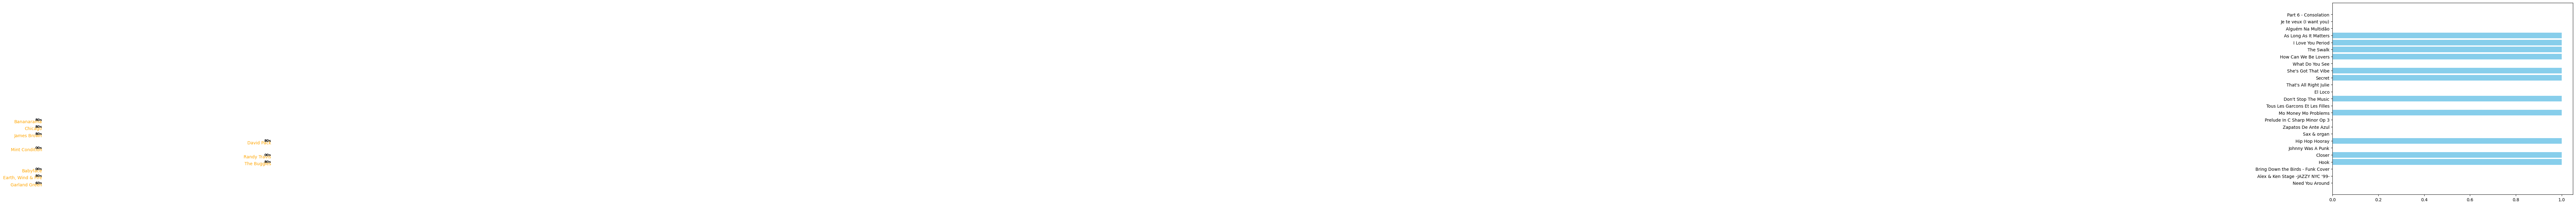

In [ ]:
# Ordenar por popularidad de manera descendente y seleccionar las 25 canciones más populares
top_25_canciones = df_3.sort_values(by='decade', ascending=False).head(25)

# Extraer los nombres de las canciones y su popularidad
canciones = top_25_canciones['track']
popularidad = top_25_canciones['popularity']

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
barras = plt.barh(canciones, popularidad, color='skyblue')  # Asegurarse de asignar a 'barras'

# Agregar texto dentro de las barras
for i, barra in enumerate(barras):
    # Coordenadas para posicionar el texto
    ancho_barra = barra.get_width()
    posicion_y = barra.get_y() + barra.get_height() / 2

    # Añadir el texto de la década (negrita, tamaño 8)
    plt.text(ancho_barra - 10, posicion_y, f'{decadas.iloc[i]}',
             va='center', ha='right', fontsize=8, color='black', fontweight='bold')

    # Añadir el texto del artista (naranja, tamaño 10)
    plt.text(ancho_barra - 10, posicion_y - barra.get_height() / 3, f'{artistas.iloc[i]}',
             va='center', ha='right', fontsize=10, color='orange')

# Configuración de los ejes y el título
plt.xlabel('Popularidad')
plt.ylabel('Canción')
plt.title('Top 25 Canciones Más Populares')

# Invertir el eje y para que la canción más popular aparezca en la parte superior
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()

<ipython-input-48-d90977426f51>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='decade', y='count', data=canciones_por_decada, palette='muted')


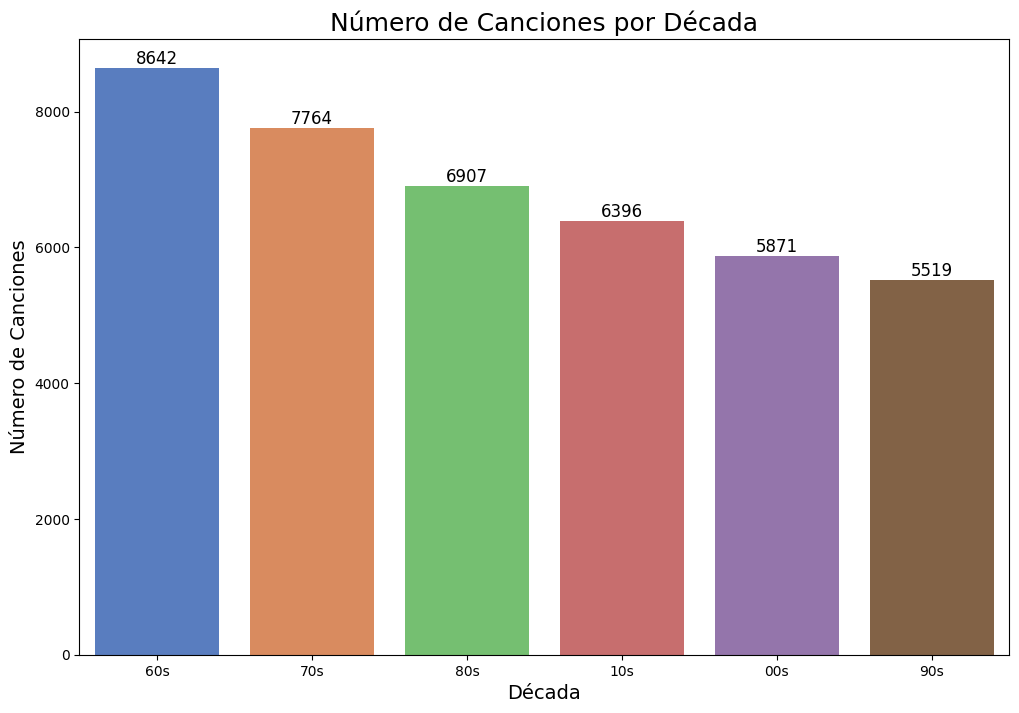

In [ ]:
import seaborn as sns


# Agrupar por 'decade' y contar el número de canciones en cada grupo
canciones_por_decada = df_3['decade'].value_counts().reset_index()
canciones_por_decada.columns = ['decade', 'count']

# Crear el gráfico de barras usando seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='decade', y='count', data=canciones_por_decada, palette='muted')

# Añadir etiquetas encima de las barras
for index, row in canciones_por_decada.iterrows():
    plt.text(row.name, row['count'] + 1, f'{row["count"]}', ha='center', va='bottom', fontsize=12)

# Configuración de los ejes y el título
plt.xlabel('Década', fontsize=14)
plt.ylabel('Número de Canciones', fontsize=14)
plt.title('Número de Canciones por Década', fontsize=18)

# Mostrar el gráfico
plt.show()


**distribucion de canciones segun decada**
matplotlib  



Text(0.5, 1.0, 'Distribución de Canciones por Década')

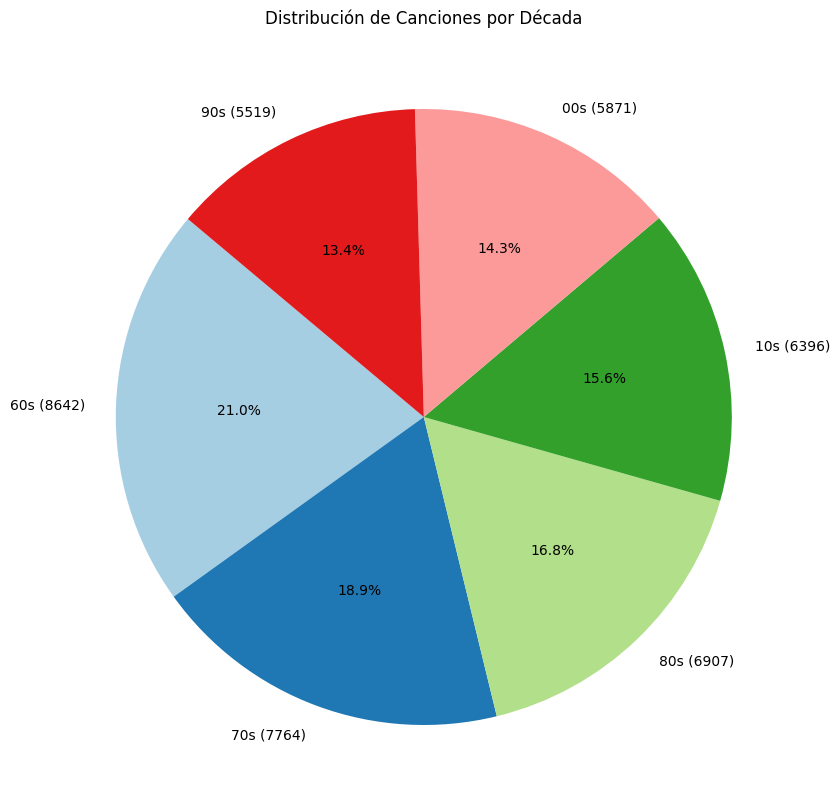

In [ ]:
# Agrupar por 'decade' y contar el número de canciones en cada grupo
canciones_por_decada = df_3['decade'].value_counts()

# Extraer las etiquetas y los tamaños (número de canciones)
etiquetas = canciones_por_decada.index
tamaños = canciones_por_decada.values

# Crear el gráfico de tortas
plt.figure(figsize=(10, 10))
plt.pie(tamaños, labels=[f'{etiqueta} ({tamaño})' for etiqueta, tamaño in zip(etiquetas, tamaños)],
        colors=plt.cm.Paired.colors, autopct='%1.1f%%', startangle=140)

# Título del gráfico
plt.title('Distribución de Canciones por Década')

## el problema es que aparece como valor string (70s) y debo transformar 70s en 70 en una nueva columna

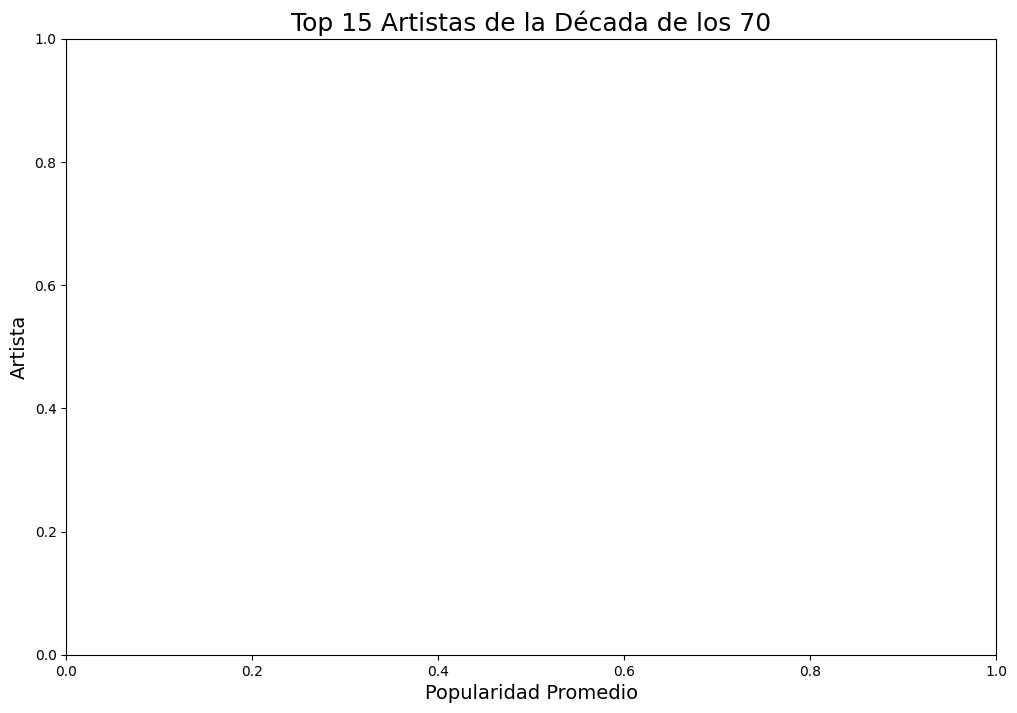

In [ ]:


# Filtrar el dataset para la década de los 70
df_70s = df_3[df_3['decade'] == 70]

# Agrupar por artista y calcular la popularidad promedio
artistas_popularidad = df_70s.groupby('artist')['popularity'].mean().reset_index()

# Ordenar los artistas por popularidad de forma descendente y seleccionar los 15 mejores
top_15_artistas = artistas_popularidad.sort_values(by='popularity', ascending=False).head(15)

# Crear el gráfico de barras usando seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='artist', data=top_15_artistas, palette='viridis')

# Añadir etiquetas con la popularidad al lado de las barras
for index, row in top_15_artistas.iterrows():
    plt.text(row['popularity'] + 0.5, index, f'{row["popularity"]:.2f}', ha='left', va='center', fontsize=12)

# Configuración de los ejes y el título
plt.xlabel('Popularidad Promedio', fontsize=14)
plt.ylabel('Artista', fontsize=14)
plt.title('Top 15 Artistas de la Década de los 70', fontsize=18)

# Mostrar el gráfico
plt.show()

In [ ]:
# Verificar si hay datos en el DataFrame filtrado
print(df_70s.shape)
print(df_70s.head())

(0, 20)
Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade]
Index: []


In [7]:
# Ordenar el DataFrame por la cantidad de menciones en orden descendente
df_top_10_artists = df_3_artists.sort_values(by='Cantidad', ascending=False)

# Seleccionar los 10 artistas con más menciones
df_top_10_artists = df_top_10_artists.head(10)

df_top_10_artists

,Artista,Cantidad
0,Traditional,207
1,Harry Belafonte,140
2,P. Susheela,130
3,Ennio Morricone,128
4,Jerry Goldsmith,124
5,Vicente Fernández,116
6,Antônio Carlos Jobim,109
7,Gilberto Gil,88
8,Frank Zappa,80
9,Raimon,79


In [ ]:
# Ver los valores únicos en la columna 'decade'
print(df_3['decade'].unique())

['60s' '70s' '80s' '90s' '00s' '10s']


**caracterizar el grupo de las canciones mas populares segun danceability energy y key**
Seaborn

In [ ]:
df_70s = df_3[df_3['decade'] == '70s']
print(df_70s.shape)
print(df_70s.head())

(7764, 20)
                  track                artist  \
8642            Porque?       Reginaldo Rossi   
8643          Free Jazz  Maria Teresa Luciani   
8644  Reject of Society                 Crass   
8645             Yeah !              The Jets   
8646   Gotta Find A Way           The Moments   

                                       uri  danceability  energy  key  \
8642  spotify:track:28KC2wl7jDv6Ms1Uc0OMpm         0.669   0.547    1   
8643  spotify:track:0zagn8PNnM7pM8pz1gXOAD         0.291   0.300    1   
8644  spotify:track:18eNASEiuAhO2ML5LBIoG4         0.355   0.968    7   
8645  spotify:track:1UlJzHc8E5EprQFJxjSyPL         0.598   0.891    6   
8646  spotify:track:1Jtlirju8tUXTtvyZJAN5v         0.440   0.376    5   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8642    -9.873     0       0.0576        0.3530             0.000    0.0515   
8643   -14.054     0       0.0326        0.9050             0.492    0.1180   
8644    -4.687    

In [8]:
duracion_ennio = ds_3[ds_3['artist'] == 'Ennio Morricone']['duration_ms'].sum()
print(duracion_ennio)

NameError: name 'ds_3' is not defined


**heat map de variables**
Seaborn